In [1]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'dseats_2024_training_dataset.csv'
df = pd.read_csv(file_path)
df.head()

PRODUCTION DATE Field Name   WELL_BORE_CODE  N_WELL_BORE_CODE  \
0  07/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   
1  08/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   
2  09/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   
3  10/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   
4  11/04/2014 00:00      DSEAT  DSEAT-001-F-1 C               105   

  WellBore Name   FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
0     001-F-1 C  production        OP                  0.00000   
1     001-F-1 C  production        OP                  0.00000   
2     001-F-1 C  production        OP                  0.00000   
3     001-F-1 C  production        OP                  0.00000   
4     001-F-1 C  production        OP               4500.45403   

   Downhole Temperature (Kelvin)  Average Tubing Pressure  \
0                      273.15000                  0.00000   
1                      273.15000                  0.00000   
2                      273.15000                  0.00000   
3                      273.15000                  0.00000   
4                      370.02589               4020.53477   

   Annulus Pressure (PSI)  AVG WHP (PSI)  Choke Size  \
0                     0.0        0.00000     0.00000   
1                     0.0        0.00000     0.00000   
2                     0.0        0.00000     0.00000   
3                     0.0        0.00000     0.00000   
4                     0.0      479.91926    33.07195   

   Oil Production (stb/day)  Gas Volume (scf/day)  Water Production (stb/day)  
0                       0.0                   0.0                         0.0  
1                       0.0                   0.0                         0.0  
2                       0.0                   0.0                         0.0  
3                       0.0                   0.0                         0.0  
4                       0.0                   0.0                         0.0

In [3]:
# Display basic dataset information
print("Dataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Basic statistics of numerical features
print("\nStatistical Summary:")
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6925 entries, 0 to 6924
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PRODUCTION DATE                6925 non-null   object 
 1   Field Name                     6925 non-null   object 
 2   WELL_BORE_CODE                 6925 non-null   object 
 3   N_WELL_BORE_CODE               6925 non-null   int64  
 4   WellBore Name                  6925 non-null   object 
 5   FLOW_KIND                      6925 non-null   object 
 6   WELL_TYPE                      6925 non-null   object 
 7   Downhole Pressure (PSI)        6925 non-null   float64
 8   Downhole Temperature (Kelvin)  6925 non-null   float64
 9   Average Tubing Pressure        6925 non-null   float64
 10  Annulus Pressure (PSI)         6925 non-null   float64
 11  AVG WHP (PSI)                  6925 non-null   float64
 12  Choke Size                     691

N_WELL_BORE_CODE  Downhole Pressure (PSI)  \
count       6925.000000              6925.000000   
mean         107.297040              2587.482923   
std            0.980161              1588.474034   
min          105.000000                 0.000000   
25%          107.000000                 0.000000   
50%          107.000000              3378.397358   
75%          108.000000              3664.905359   
max          109.000000              4606.666675   

       Downhole Temperature (Kelvin)  Average Tubing Pressure  \
count                    6925.000000              6925.000000   
mean                      349.674794              2161.986343   
std                        46.240823              1053.875029   
min                       273.150000                 0.000000   
25%                       273.150000               896.612291   
50%                       376.911370              2472.031527   
75%                       379.496193              2907.047474   
max                       381.652178              4592.612695   

       Annulus Pressure (PSI)  AVG WHP (PSI)   Choke Size  \
count             6925.000000    6925.000000  6919.000000   
mean               180.369383     716.576882    21.864557   
std                139.771514     347.859953    22.300691   
min                  0.000000       0.000000     0.000000   
25%                  0.000000     476.539814     4.631982   
50%                213.091127     619.647824    14.301660   
75%                300.356843     903.890487    31.529768   
max                435.287508    1991.009935   125.718570   

       Oil Production (stb/day)  Gas Volume (scf/day)  \
count               6925.000000          6.925000e+03   
mean                8494.774524          6.978690e+06   
std                 8927.596731          7.100875e+06   
min                    0.000000          0.000000e+00   
25%                 1686.600600          1.434288e+06   
50%                 5479.470600          4.770461e+06   
75%                11730.472600          9.892230e+06   
max                37122.573600          3.004494e+07   

       Water Production (stb/day)  
count                 6925.000000  
mean                 11480.559310  
std                  11484.481008  
min                  -2879.813600  
25%                     80.323300  
50%                   5529.413200  
75%                  22261.505100  
max                  50444.164600

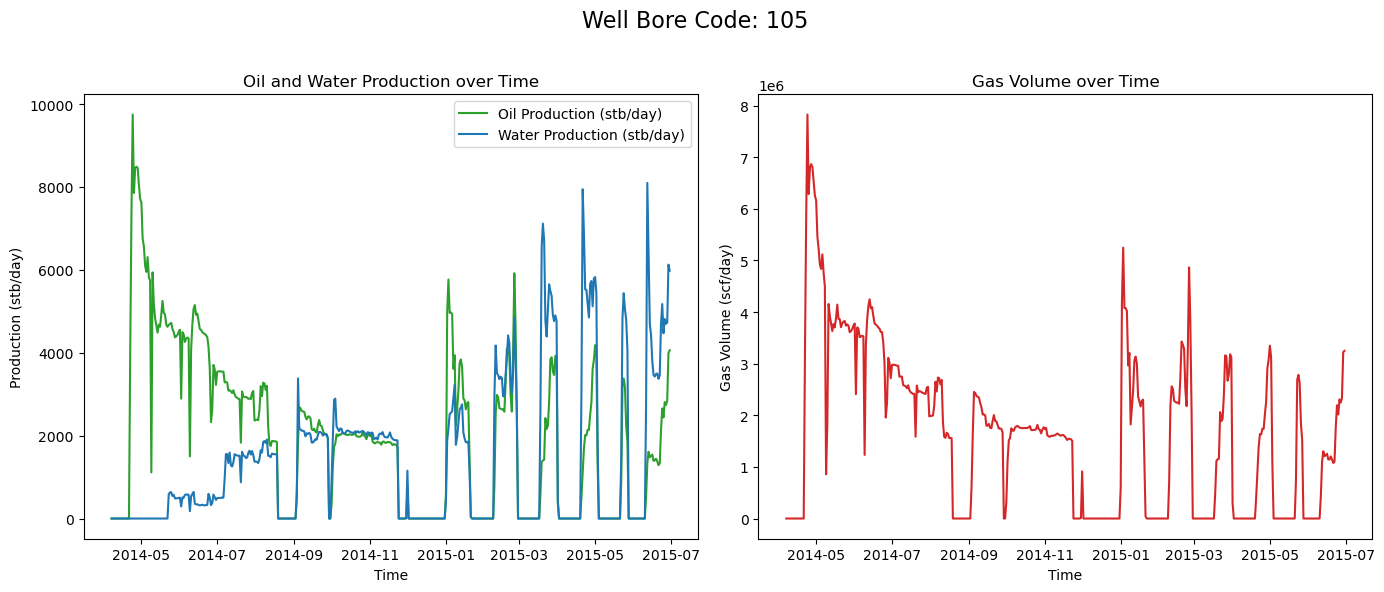

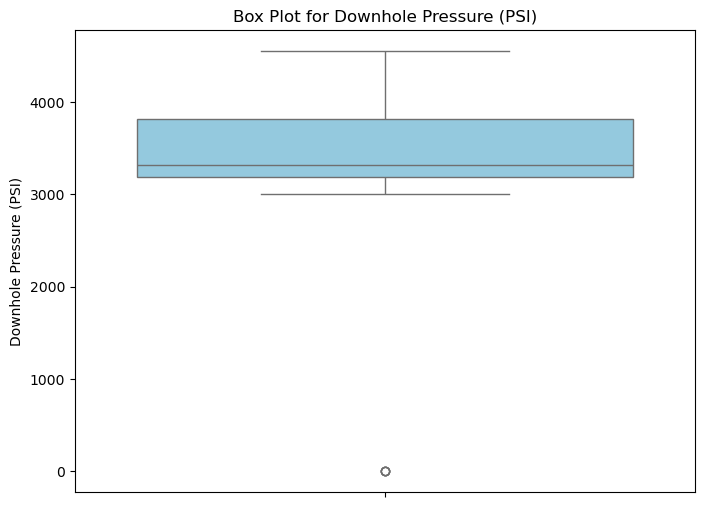

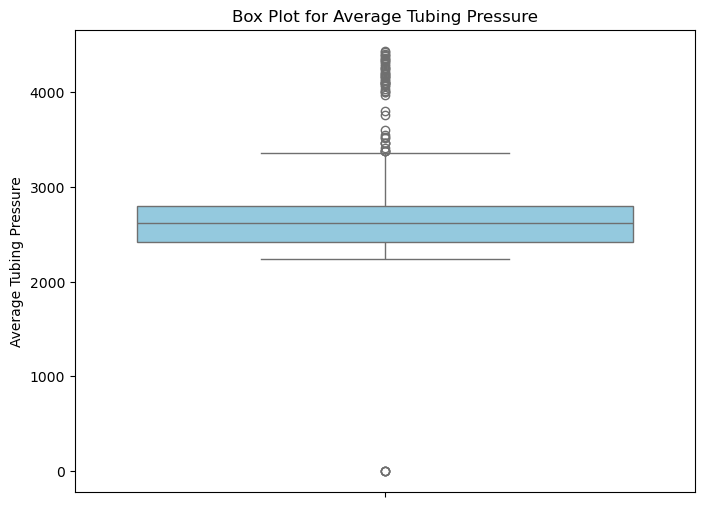

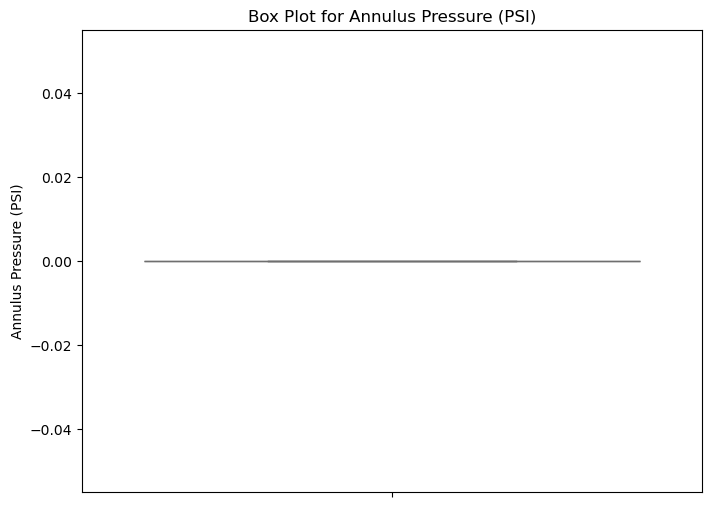

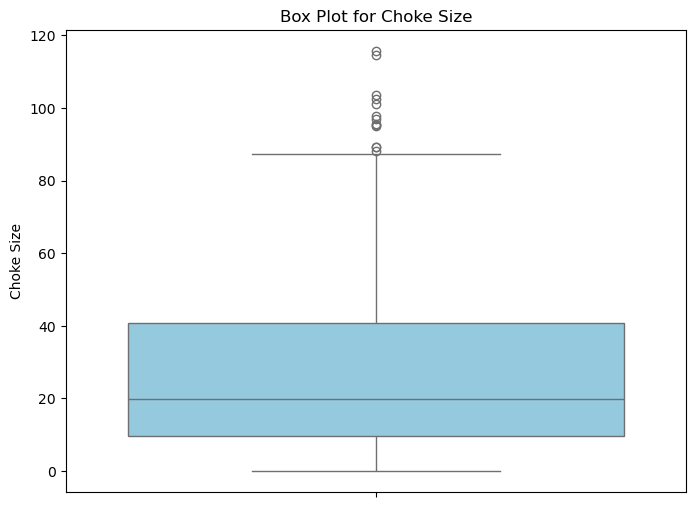

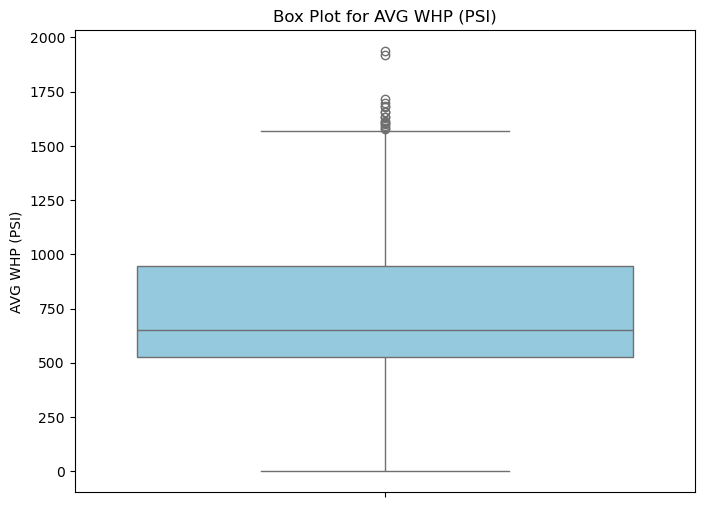

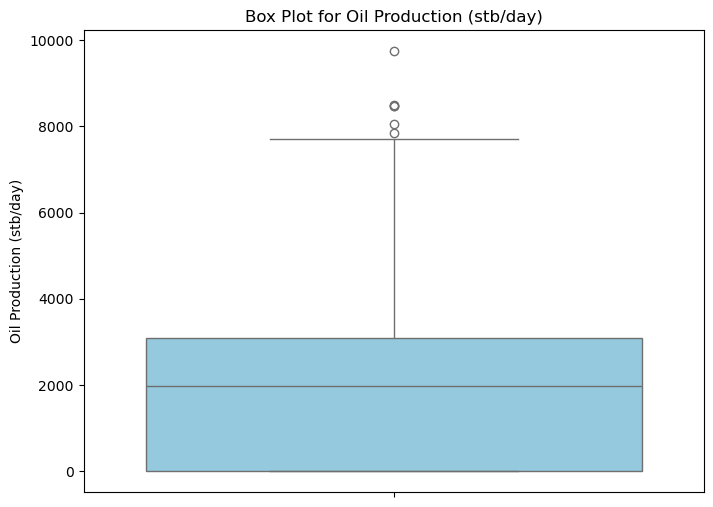

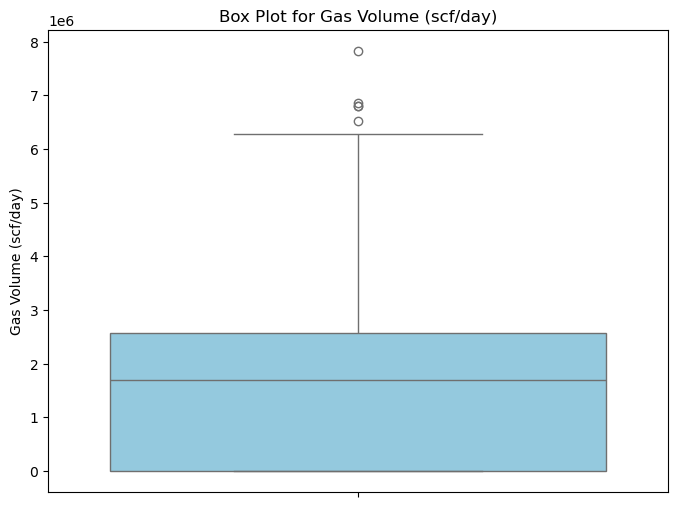

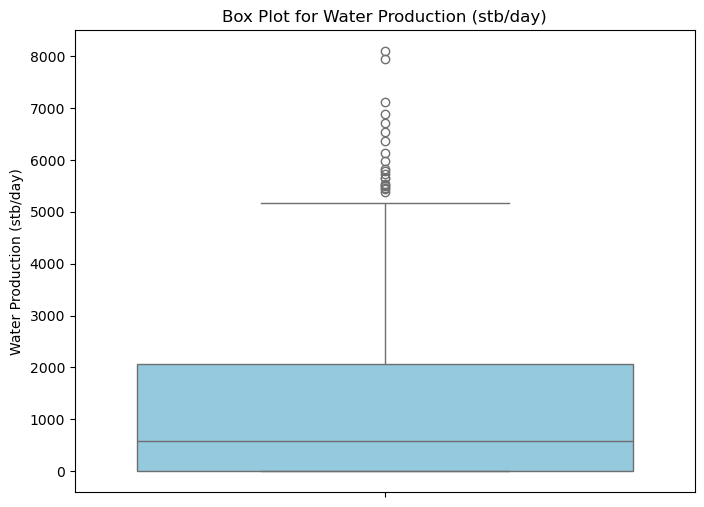

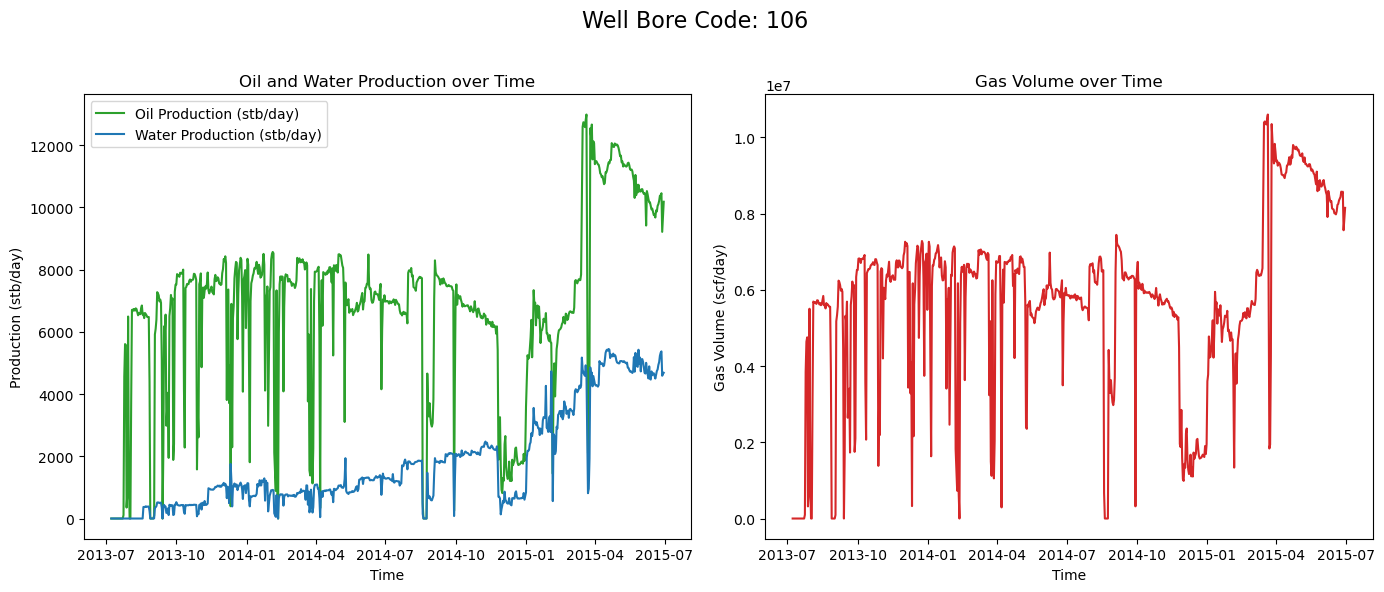

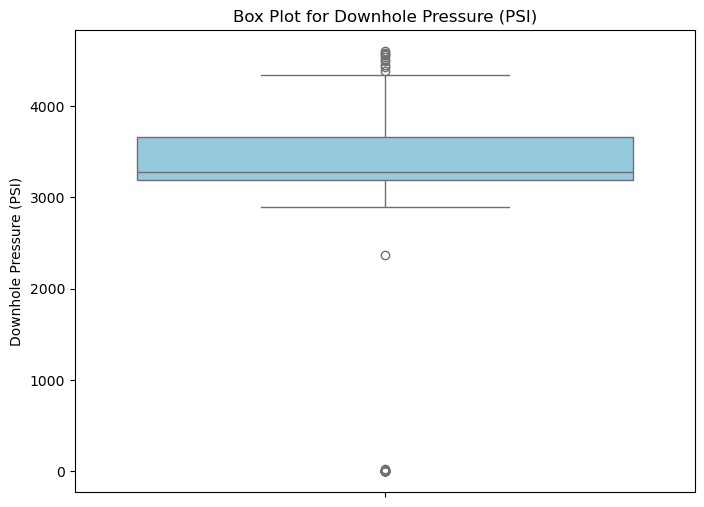

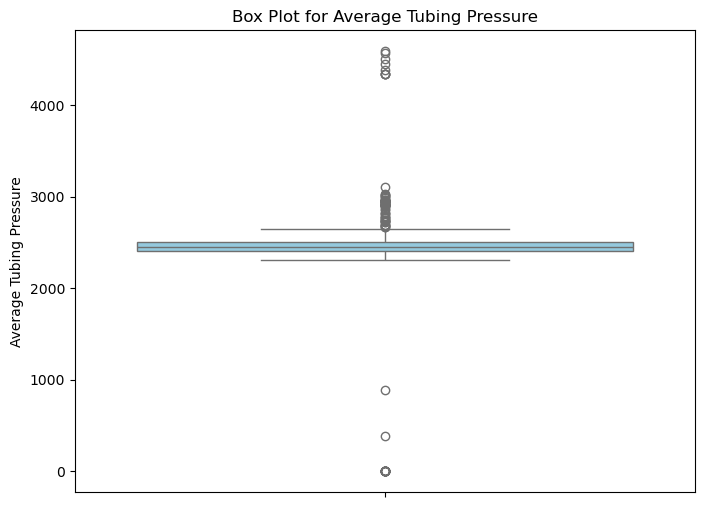

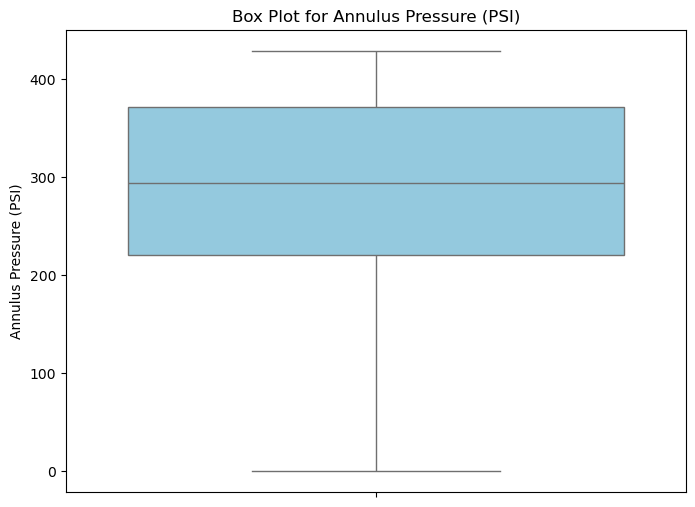

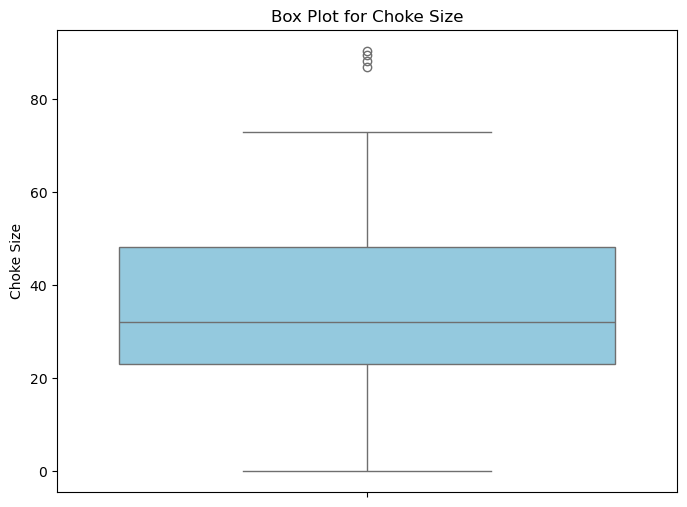

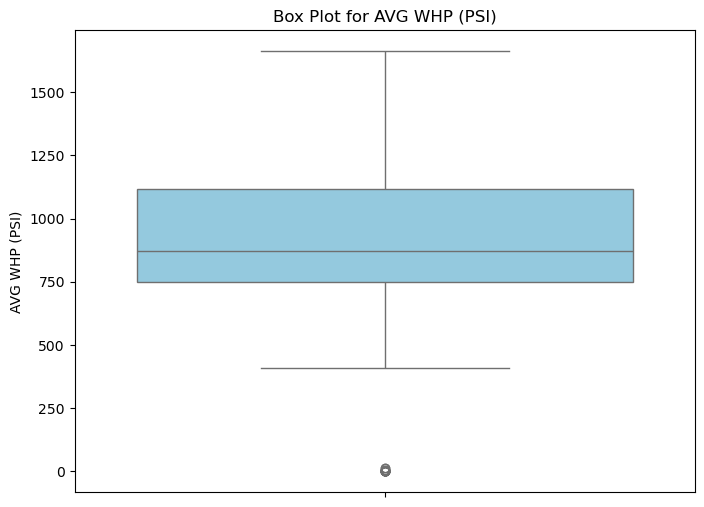

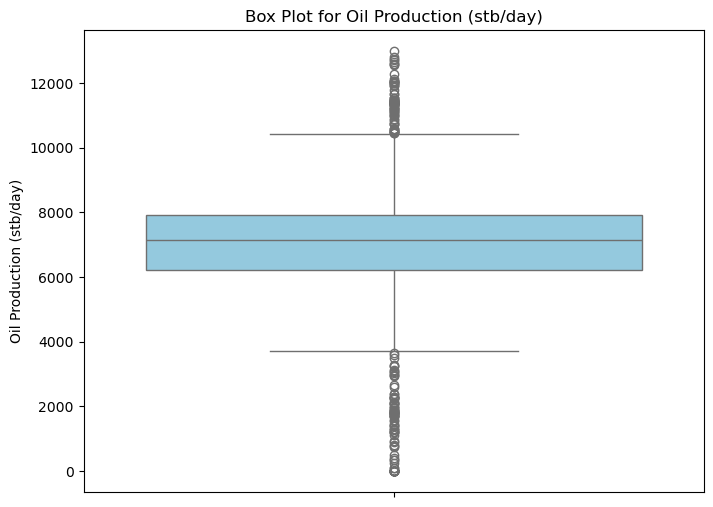

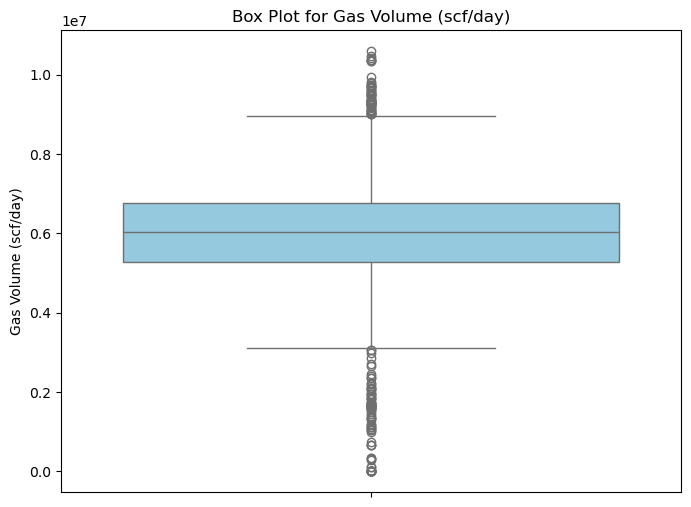

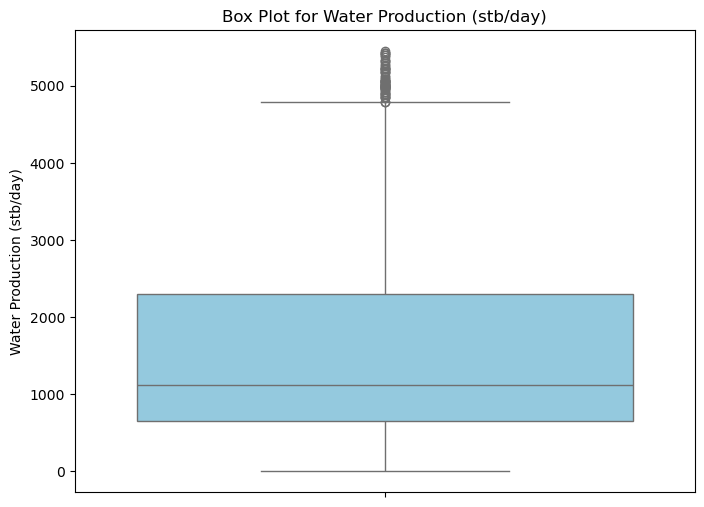

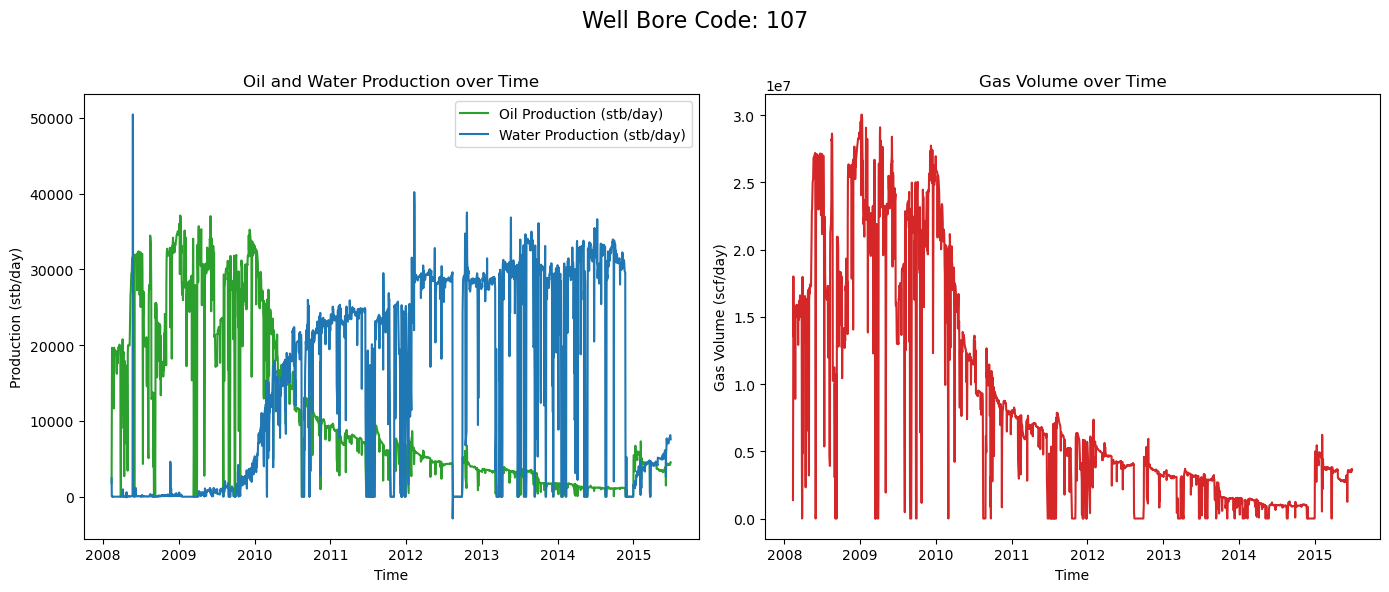

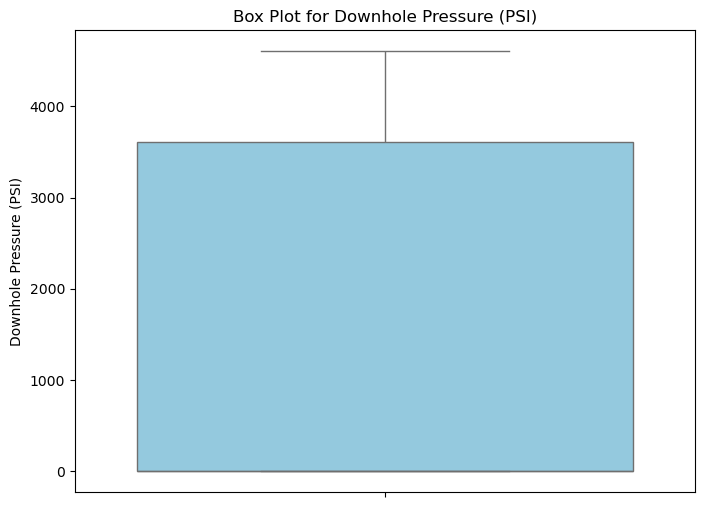

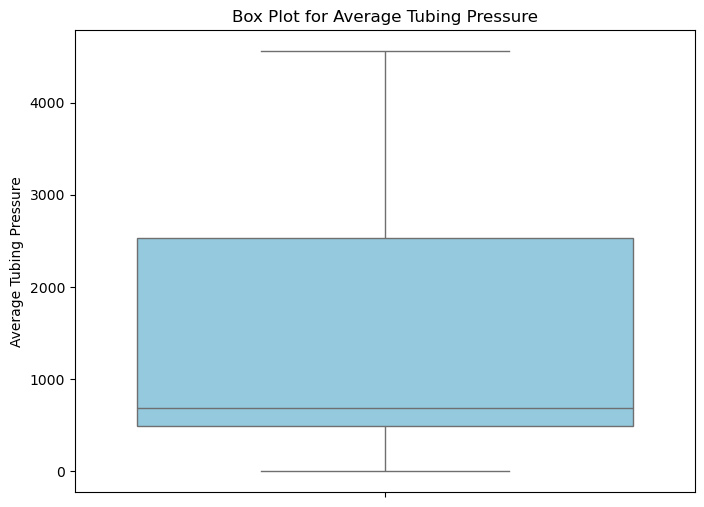

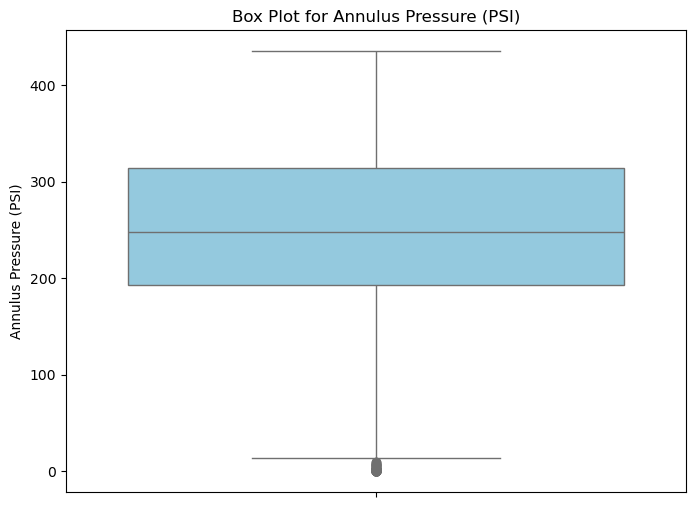

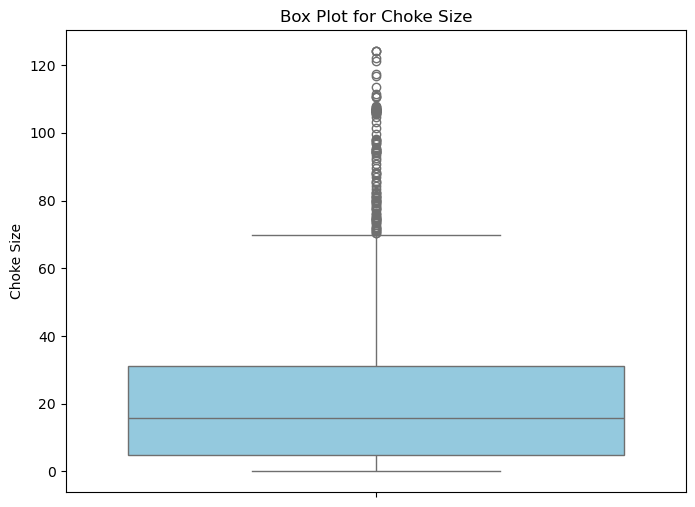

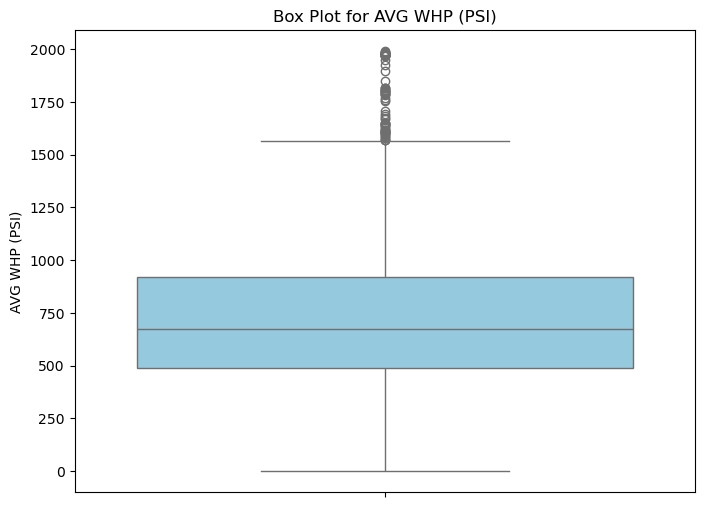

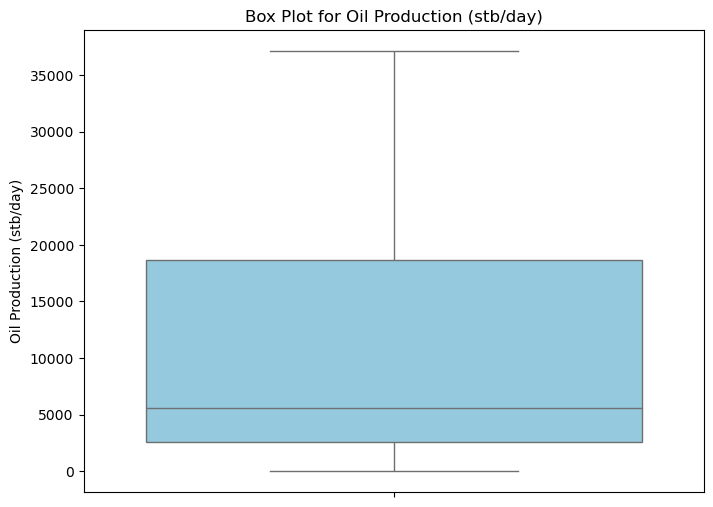

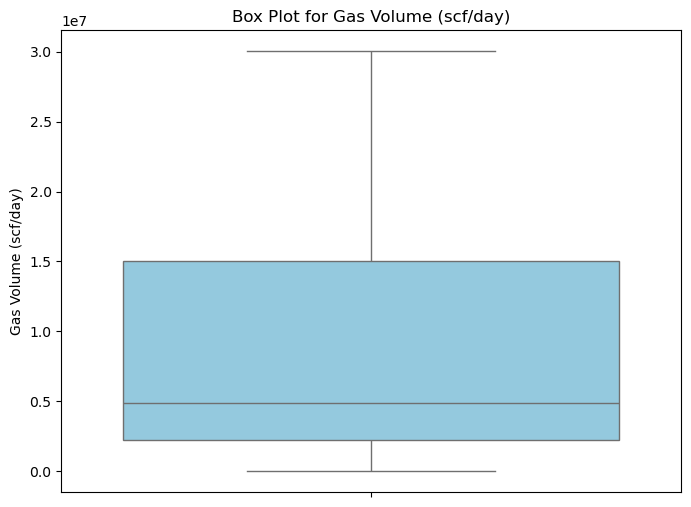

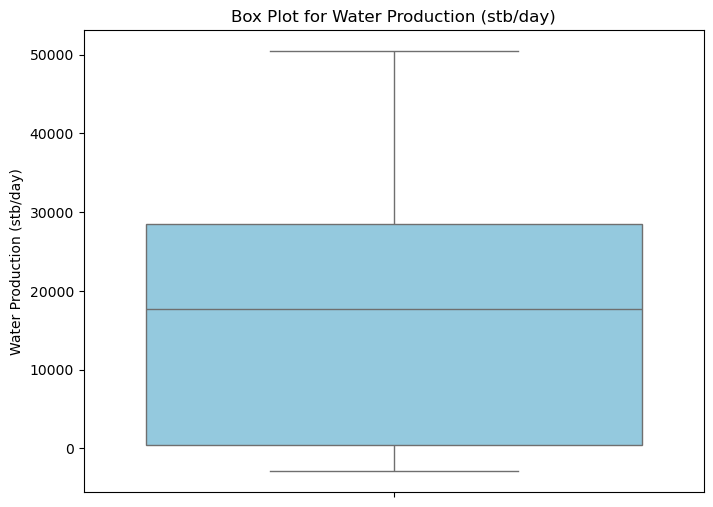

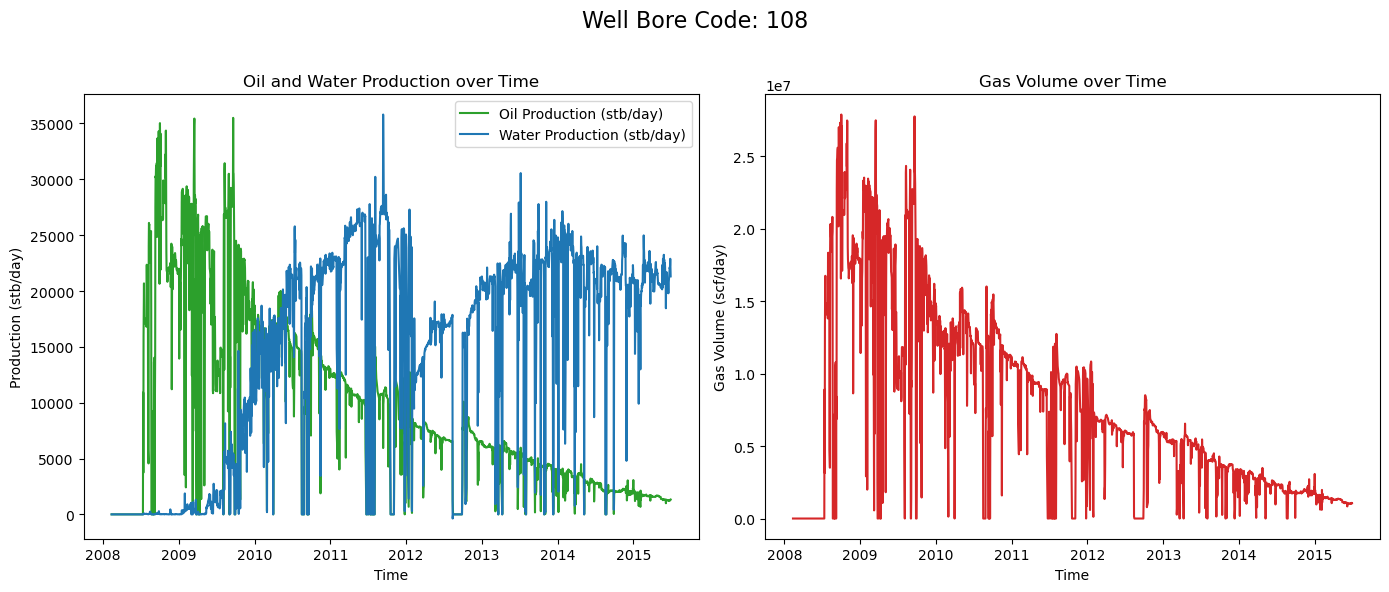

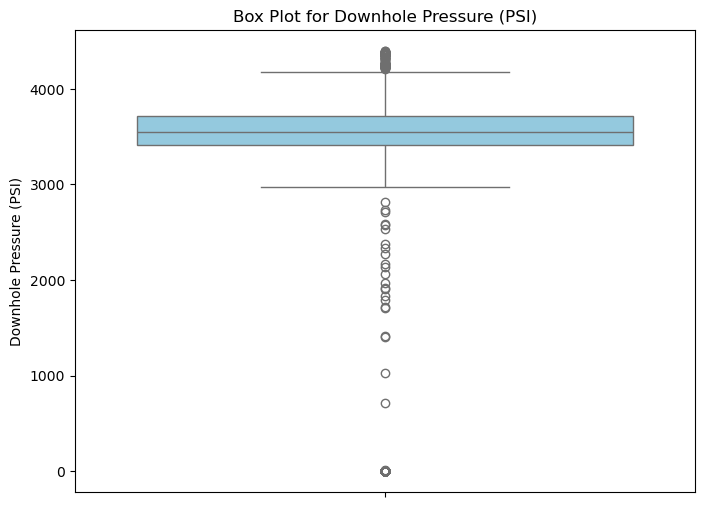

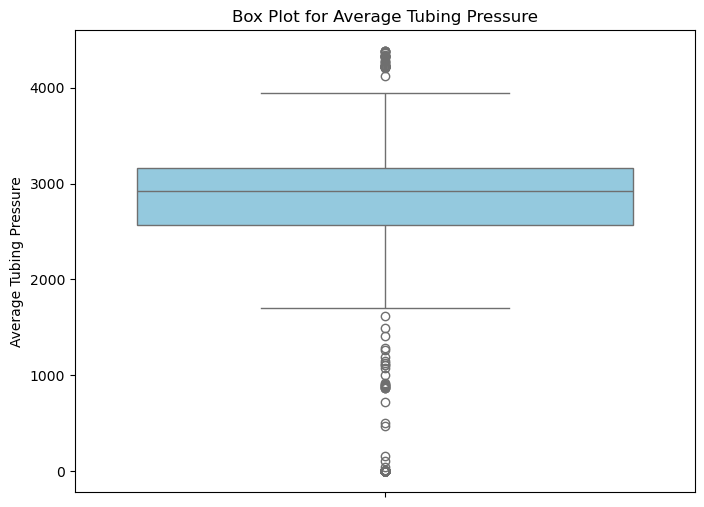

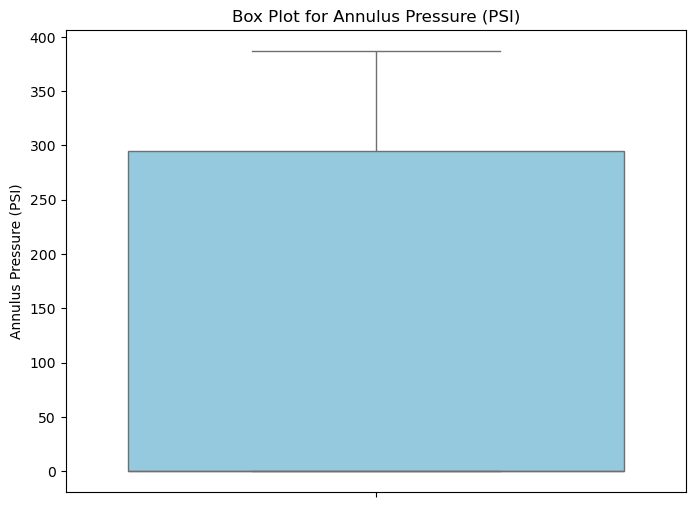

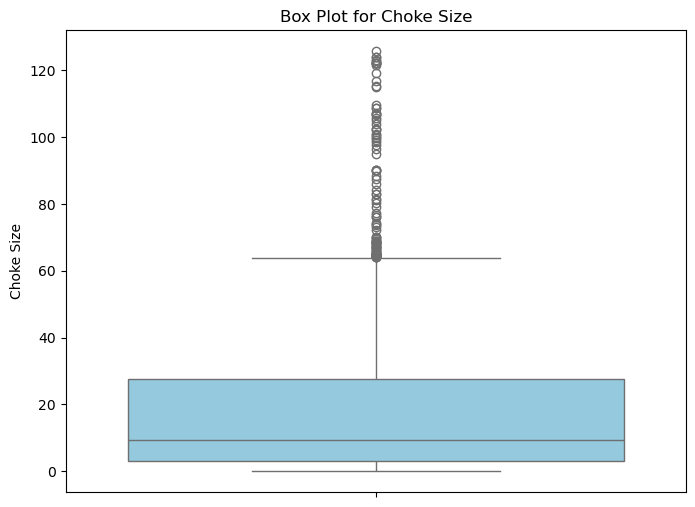

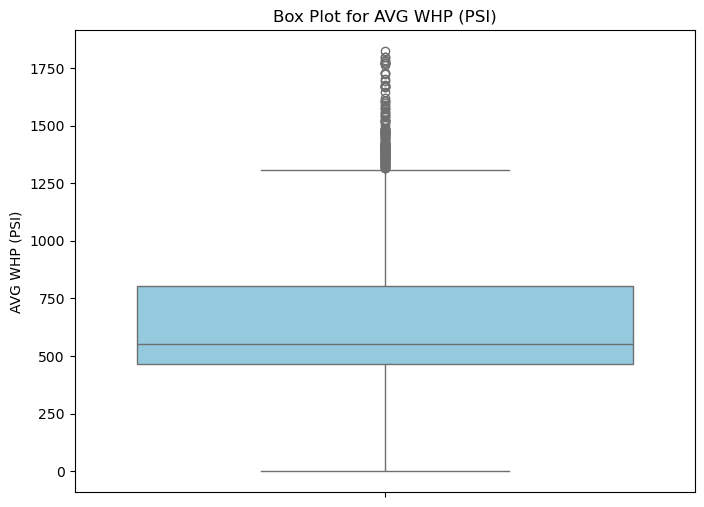

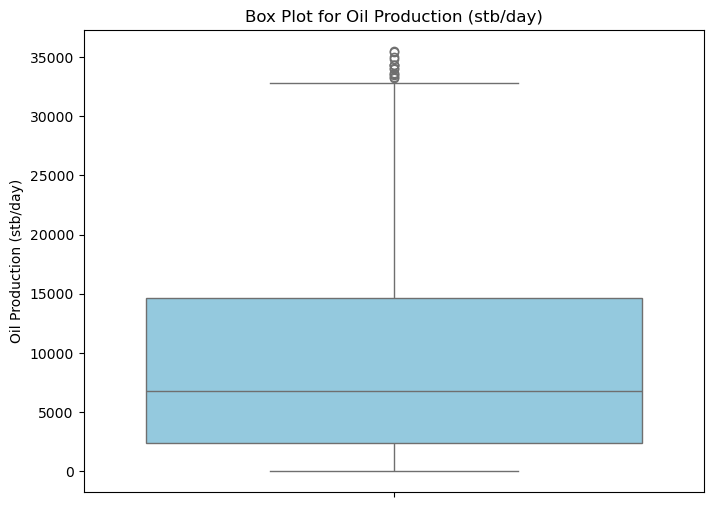

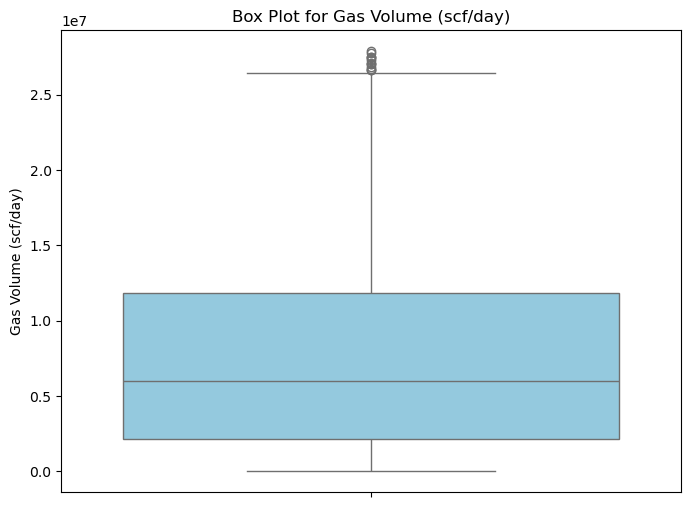

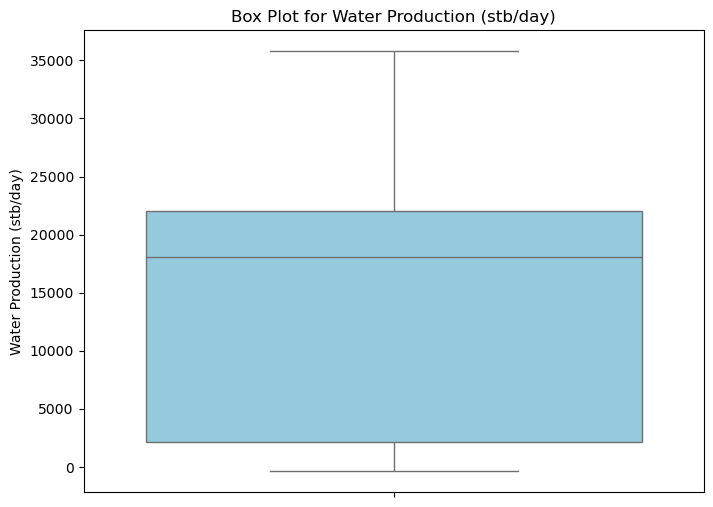

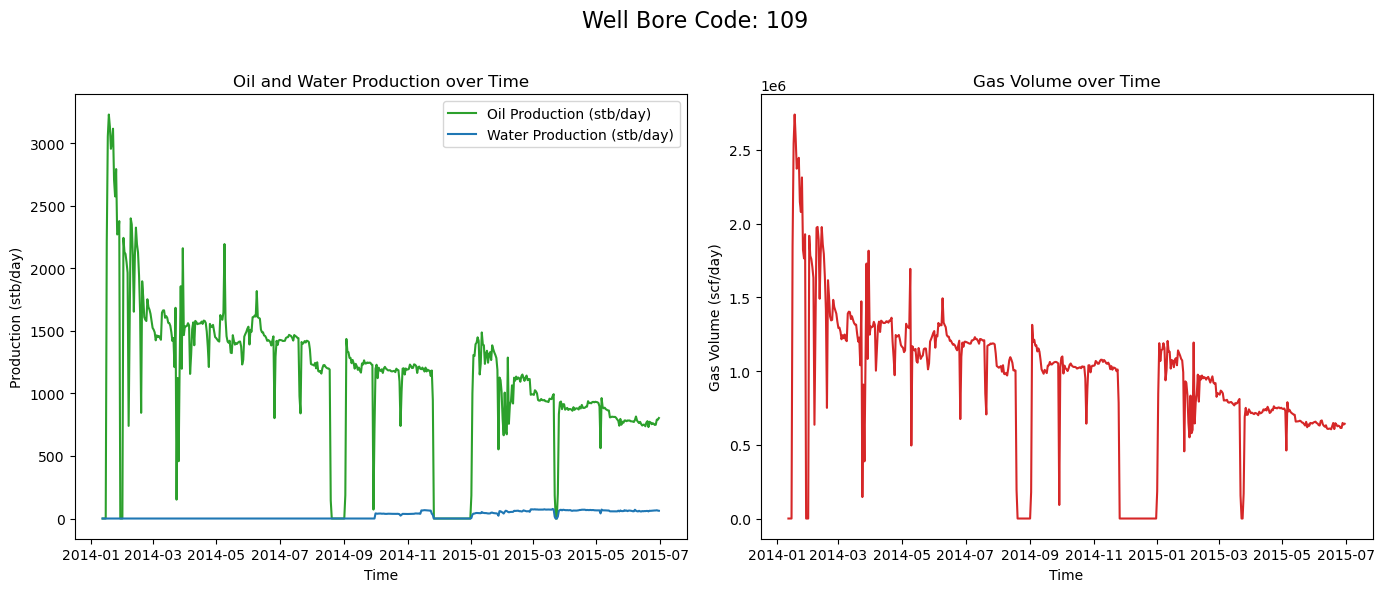

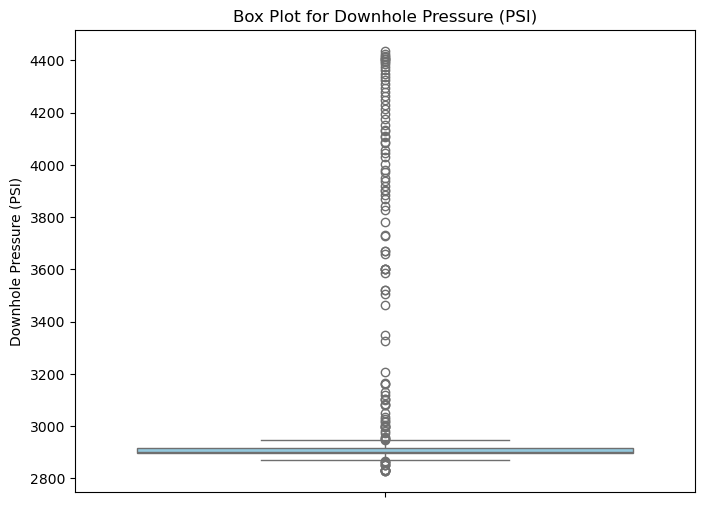

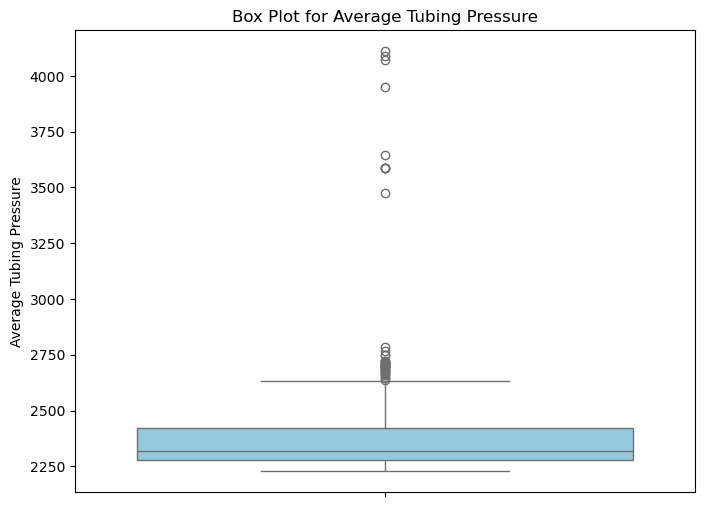

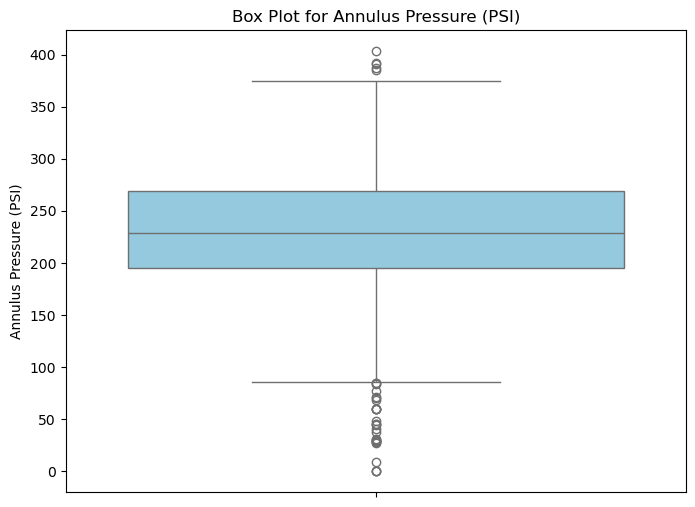

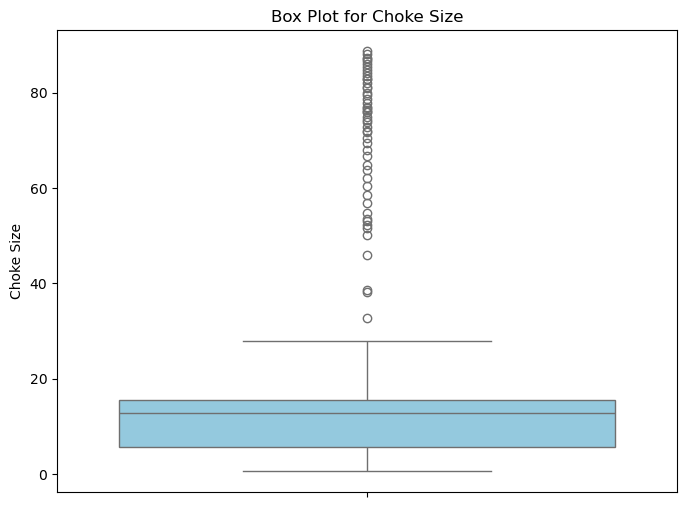

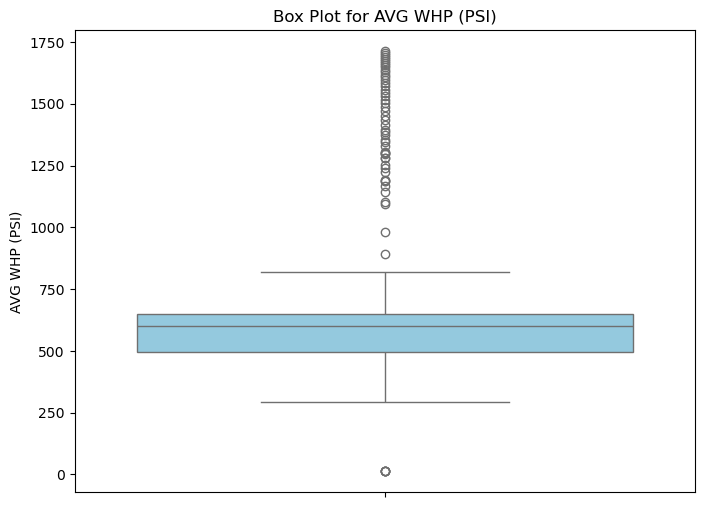

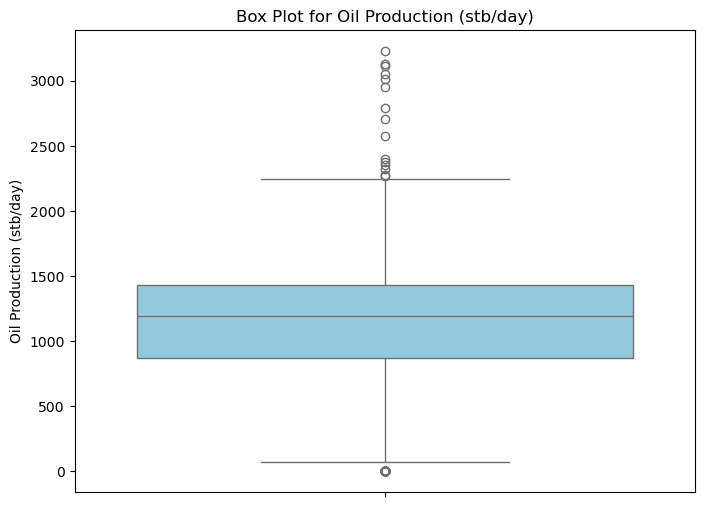

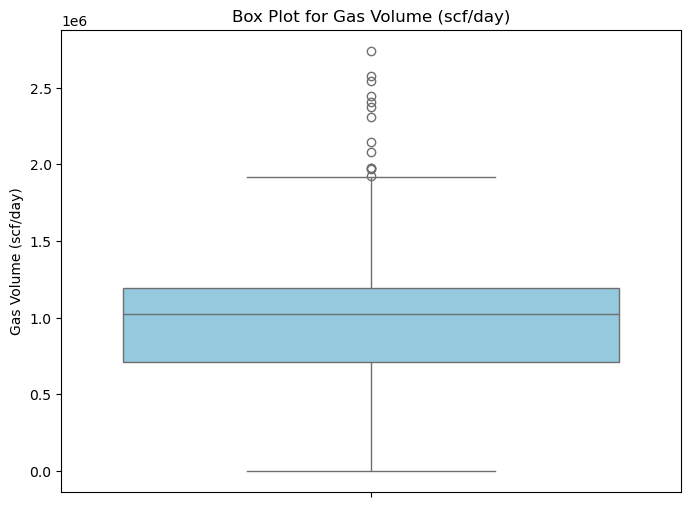

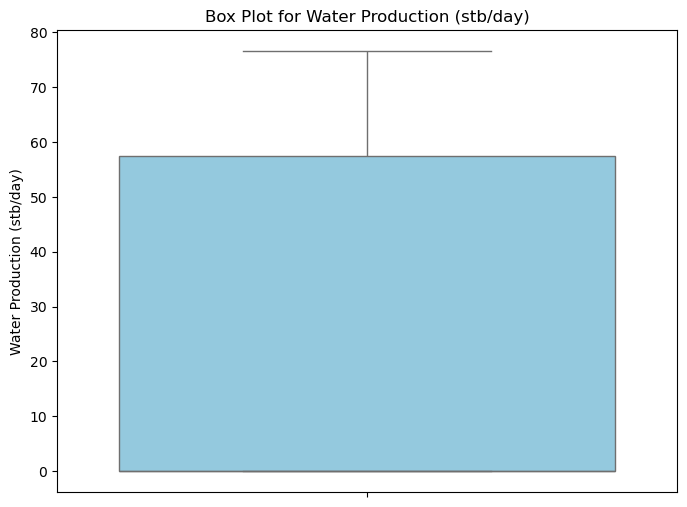

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'PRODUCTION DATE' to datetime
df['PRODUCTION DATE'] = pd.to_datetime(df['PRODUCTION DATE'], dayfirst=True)

# List unique well bore codes
well_bore_codes = df['N_WELL_BORE_CODE'].unique()

# Set up the subplots for each well bore code
for code in well_bore_codes:
    # Filter the data for the current well bore code
    well_data = df[df['N_WELL_BORE_CODE'] == code]

    # Create subplots: 1 row, 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(f'Well Bore Code: {code}', fontsize=16)

    # Oil rate and water production over time
    axs[0].plot(well_data['PRODUCTION DATE'], well_data['Oil Production (stb/day)'], label='Oil Production (stb/day)', color='tab:green')
    axs[0].plot(well_data['PRODUCTION DATE'], well_data['Water Production (stb/day)'], label='Water Production (stb/day)', color='tab:blue')
    axs[0].set_title('Oil and Water Production over Time')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Production (stb/day)')
    axs[0].legend()

    # Gas volume over time
    axs[1].plot(well_data['PRODUCTION DATE'], well_data['Gas Volume (scf/day)'], label='Gas Volume (scf/day)', color='tab:red')
    axs[1].set_title('Gas Volume over Time')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Gas Volume (scf/day)')

    # Adjust layout for the time plots
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # Create a separate box plot for each numerical column
    numerical_columns = ['Downhole Pressure (PSI)', 'Average Tubing Pressure', 'Annulus Pressure (PSI)', 'Choke Size',
                         'AVG WHP (PSI)', 'Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)']

    for col in numerical_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=well_data[col], color='skyblue')
        plt.title(f'Box Plot for {col}')
        plt.ylabel(col)
        plt.show()


In [7]:
# Check for negative rates in the dataset
negative_rates = df[(df['Oil Production (stb/day)'] < 0) |
                      (df['Gas Volume (scf/day)'] < 0) |
                      (df['Water Production (stb/day)'] < 0)]
print("Negative Rates Found:")
negative_rates

Negative Rates Found:


PRODUCTION DATE Field Name    WELL_BORE_CODE  N_WELL_BORE_CODE  \
1241      2008-04-23      DSEAT  DSEAT-001-F-12 H               107   
2761      2012-08-13      DSEAT  DSEAT-001-F-12 H               107   
4164      2009-03-03      DSEAT  DSEAT-001-F-14 H               108   
5372      2012-08-13      DSEAT  DSEAT-001-F-14 H               108   

     WellBore Name   FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
1241      001-F-12  production        OP              3778.090061   
2761      001-F-12  production        OP                 0.000000   
4164      001-F-14  production        OP              3919.223637   
5372      001-F-14  production        OP              3666.939046   

      Downhole Temperature (Kelvin)  Average Tubing Pressure  \
1241                     378.921069              2446.120354   
2761                     273.150000               738.789964   
4164                     378.613575              2440.423694   
5372                     375.036570              2997.727129   

      Annulus Pressure (PSI)  AVG WHP (PSI)  Choke Size  \
1241              159.654201    1331.969707   60.253108   
2761              149.643422     738.789964   21.297284   
4164                0.000000    1478.799943   68.800869   
5372              214.782410     669.211917   17.203700   

      Oil Production (stb/day)  Gas Volume (scf/day)  \
1241                17206.4837          1.490066e+07   
2761                 3981.3184          4.279550e+05   
4164                27293.1277          2.174814e+07   
5372                 1273.9137          1.325204e+05   

      Water Production (stb/day)  
1241                    -89.2551  
2761                  -2879.8136  
4164                     -5.9755  
5372                   -372.3051

In [9]:
df_copy = df.copy()
# Remove rows where 'Water Production (stb/day)' is negative or 'Choke Size' is NaN
df = df[(df['Water Production (stb/day)'] >= 0) & df['Choke Size'].notna()]

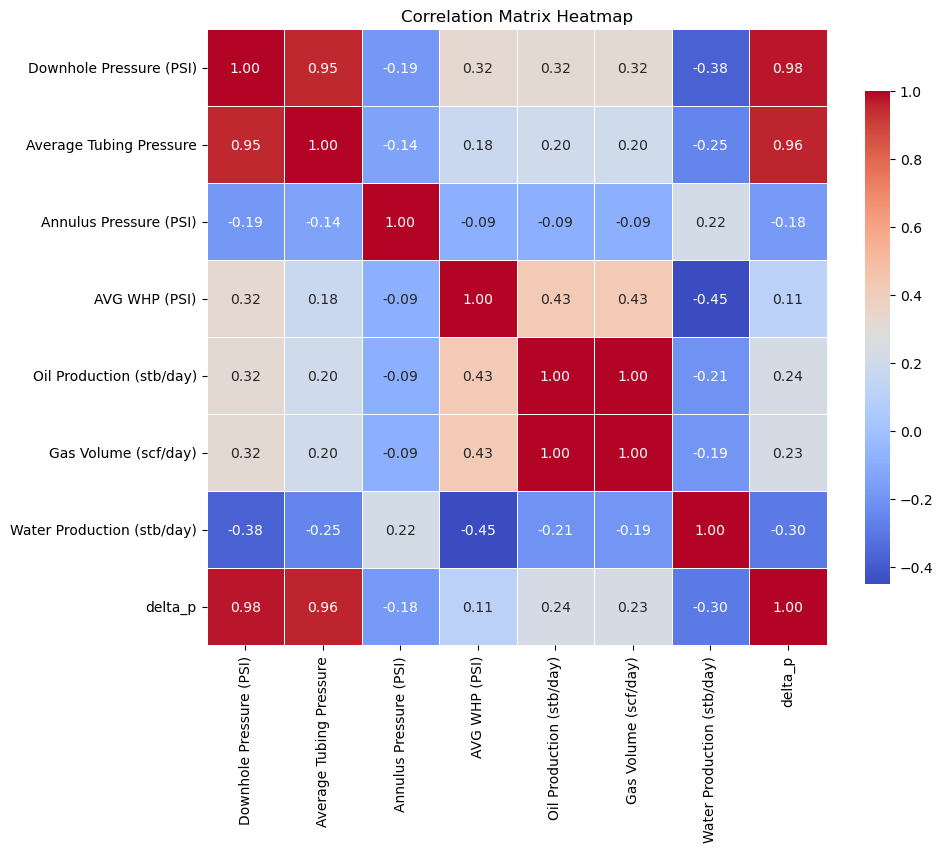

In [11]:
# Create a new column 'delta_p' as the difference between 'Downhole Pressure (PSI)' and 'AVG WHP (PSI)'
df['delta_p'] = df['Downhole Pressure (PSI)'] - df['AVG WHP (PSI)']
numerical_columns = ['Downhole Pressure (PSI)', 'Average Tubing Pressure', 'Annulus Pressure (PSI)',
                     'AVG WHP (PSI)', 'Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)', 'delta_p']

# Compute the correlation matrix for the numerical columns
correlation_matrix = df[numerical_columns].corr()

# Set up the heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

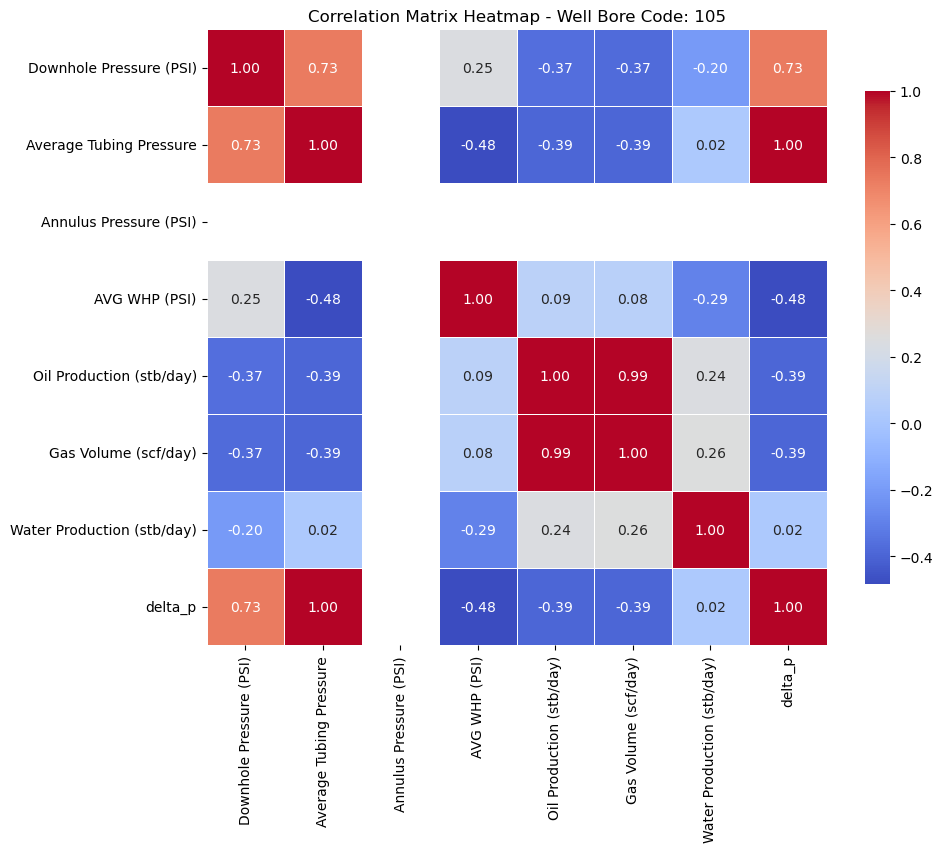

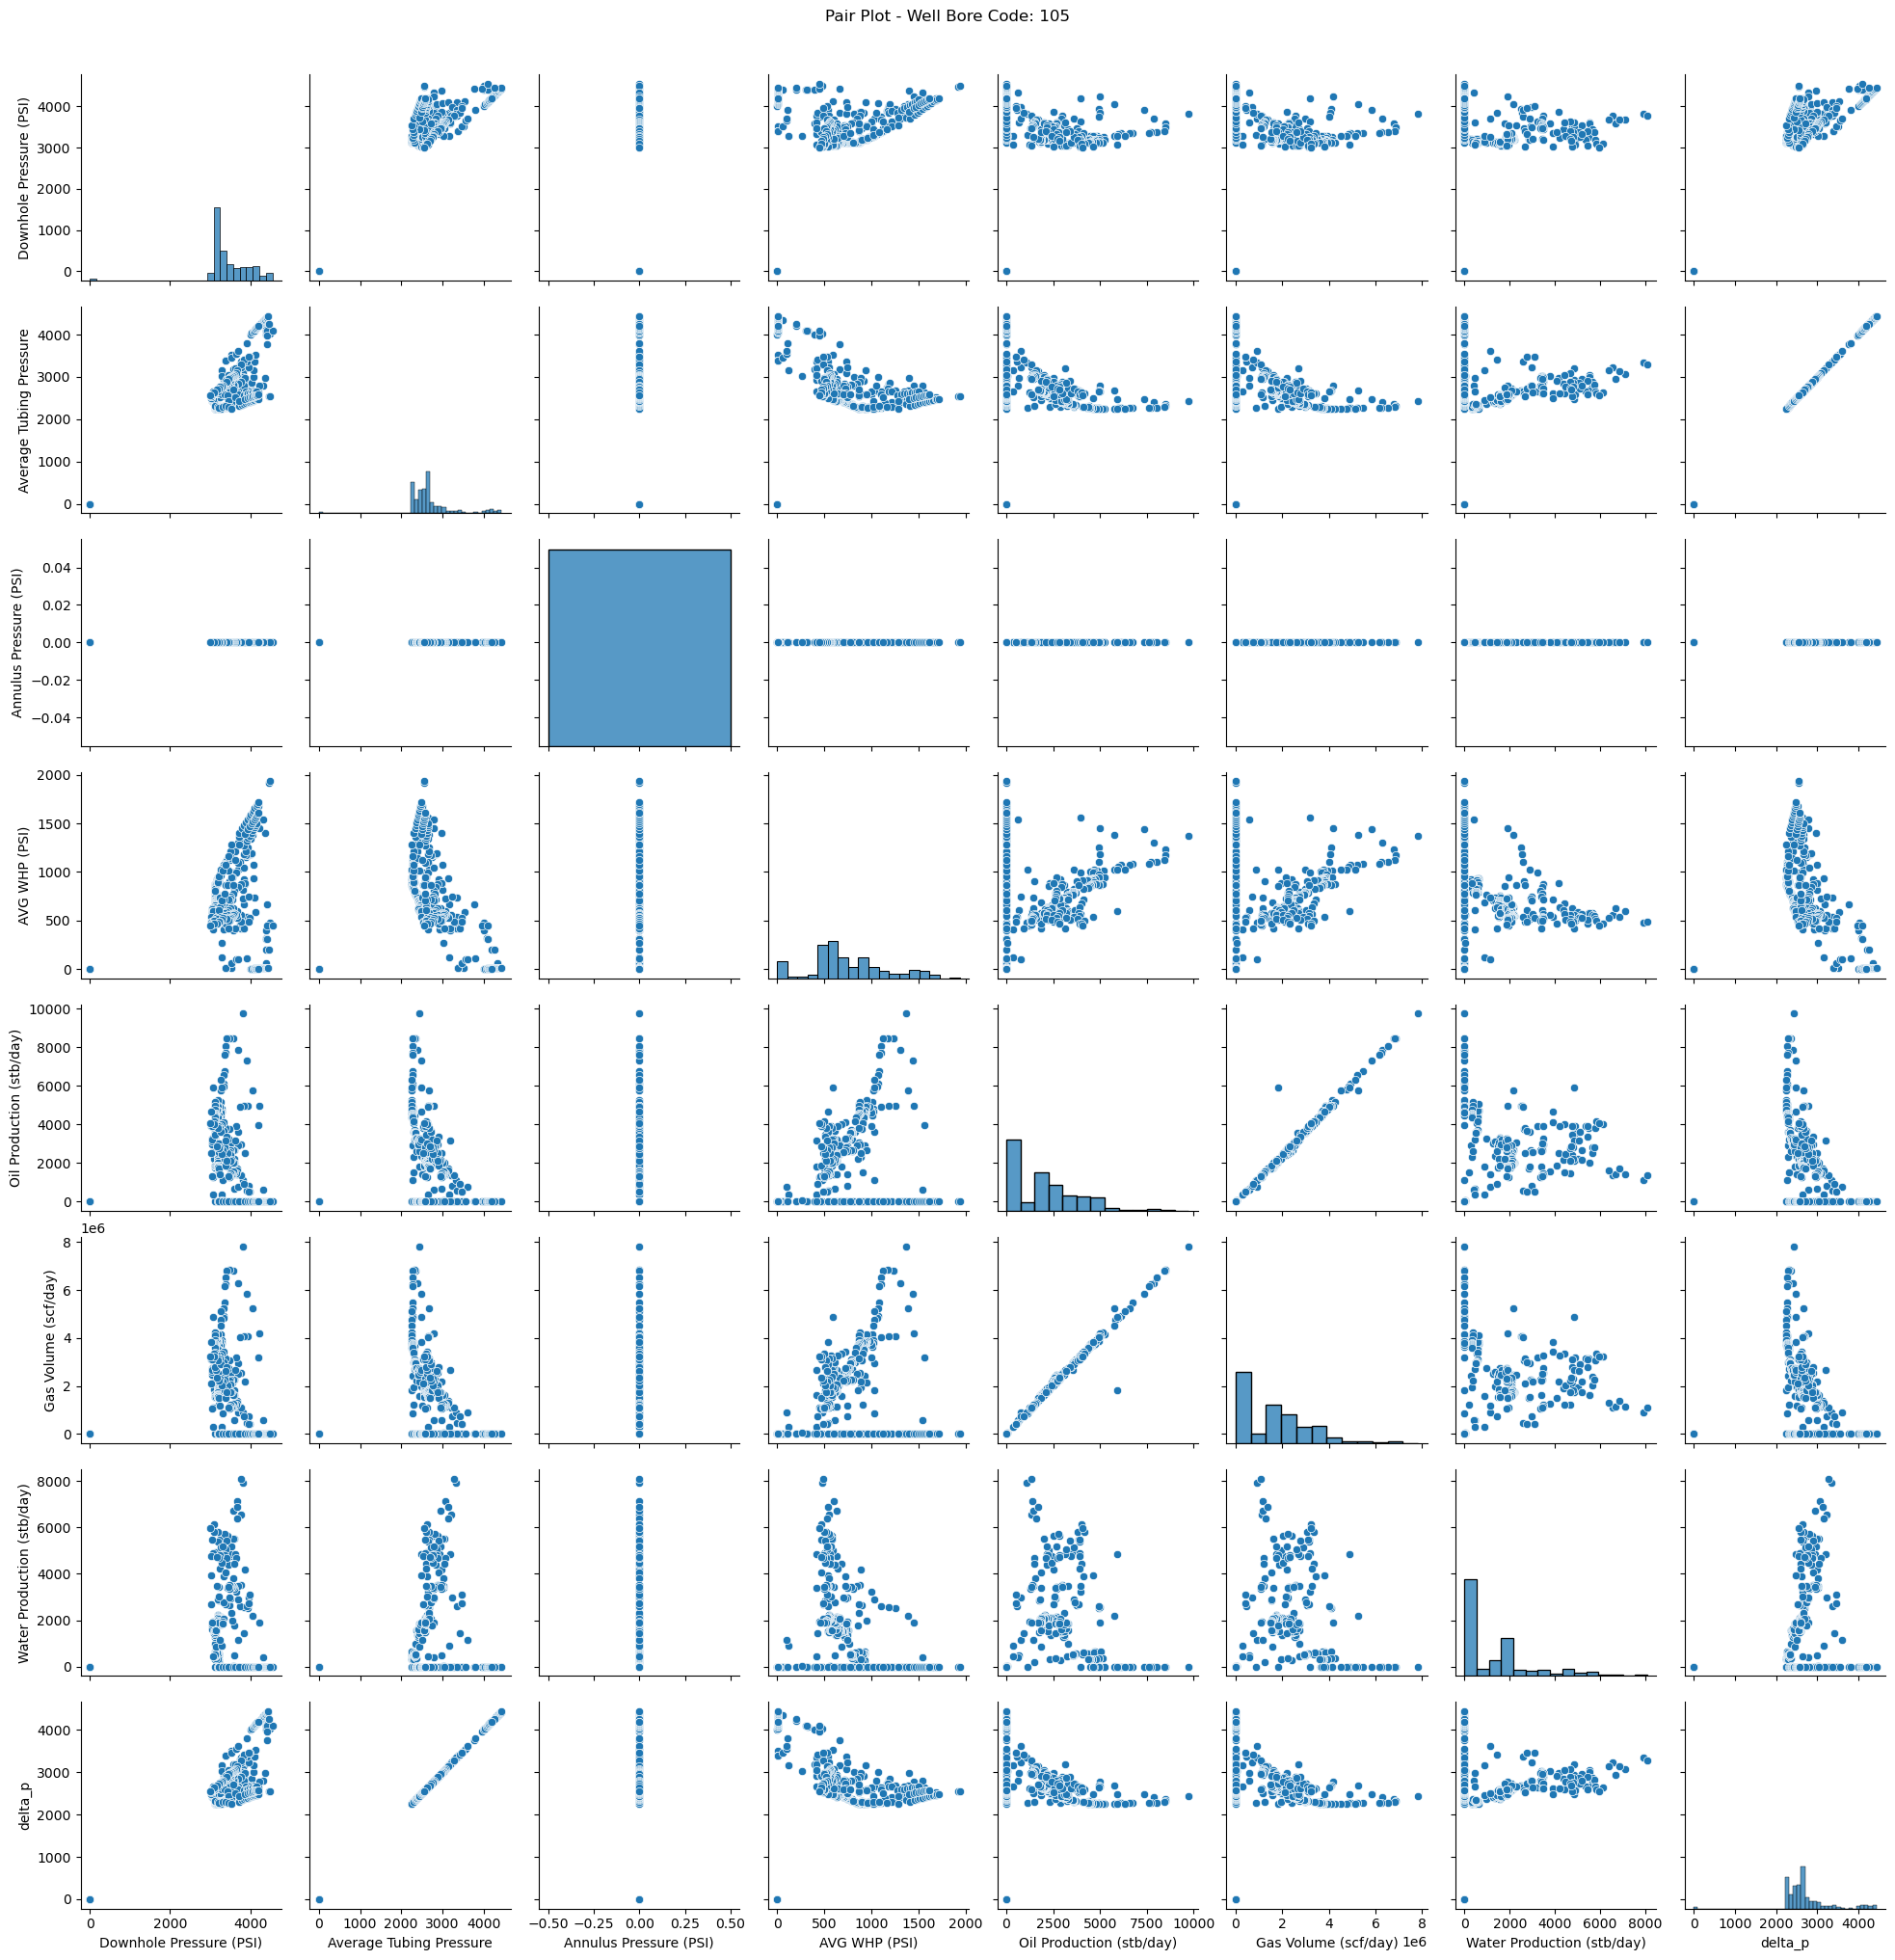

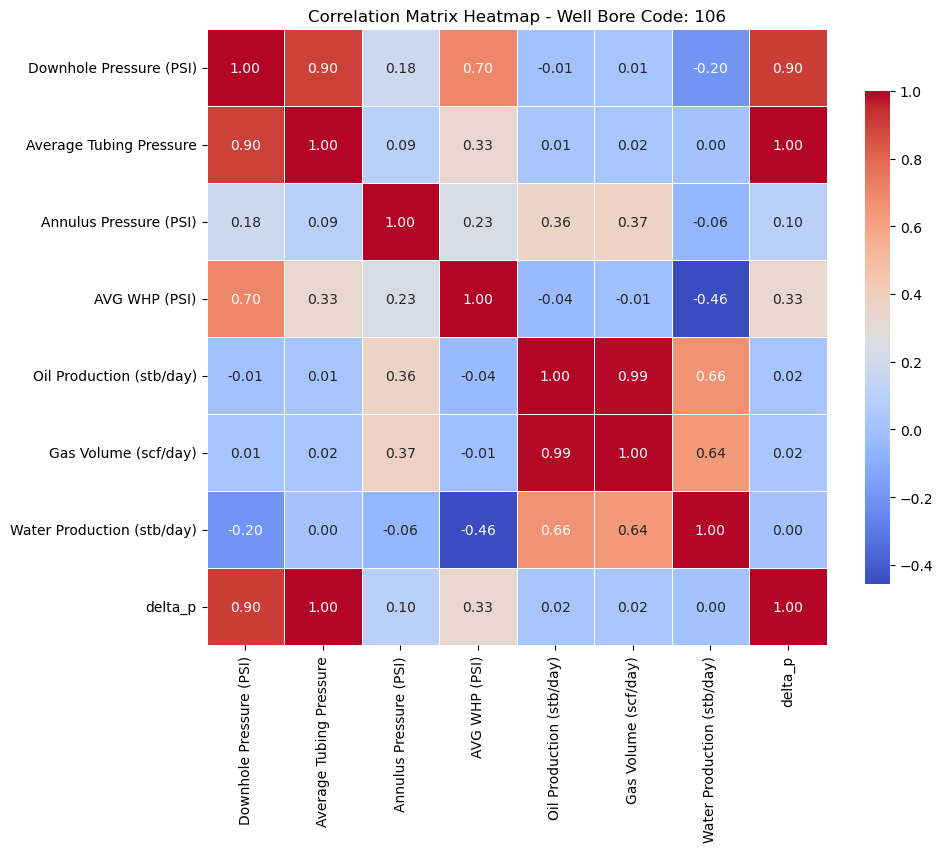

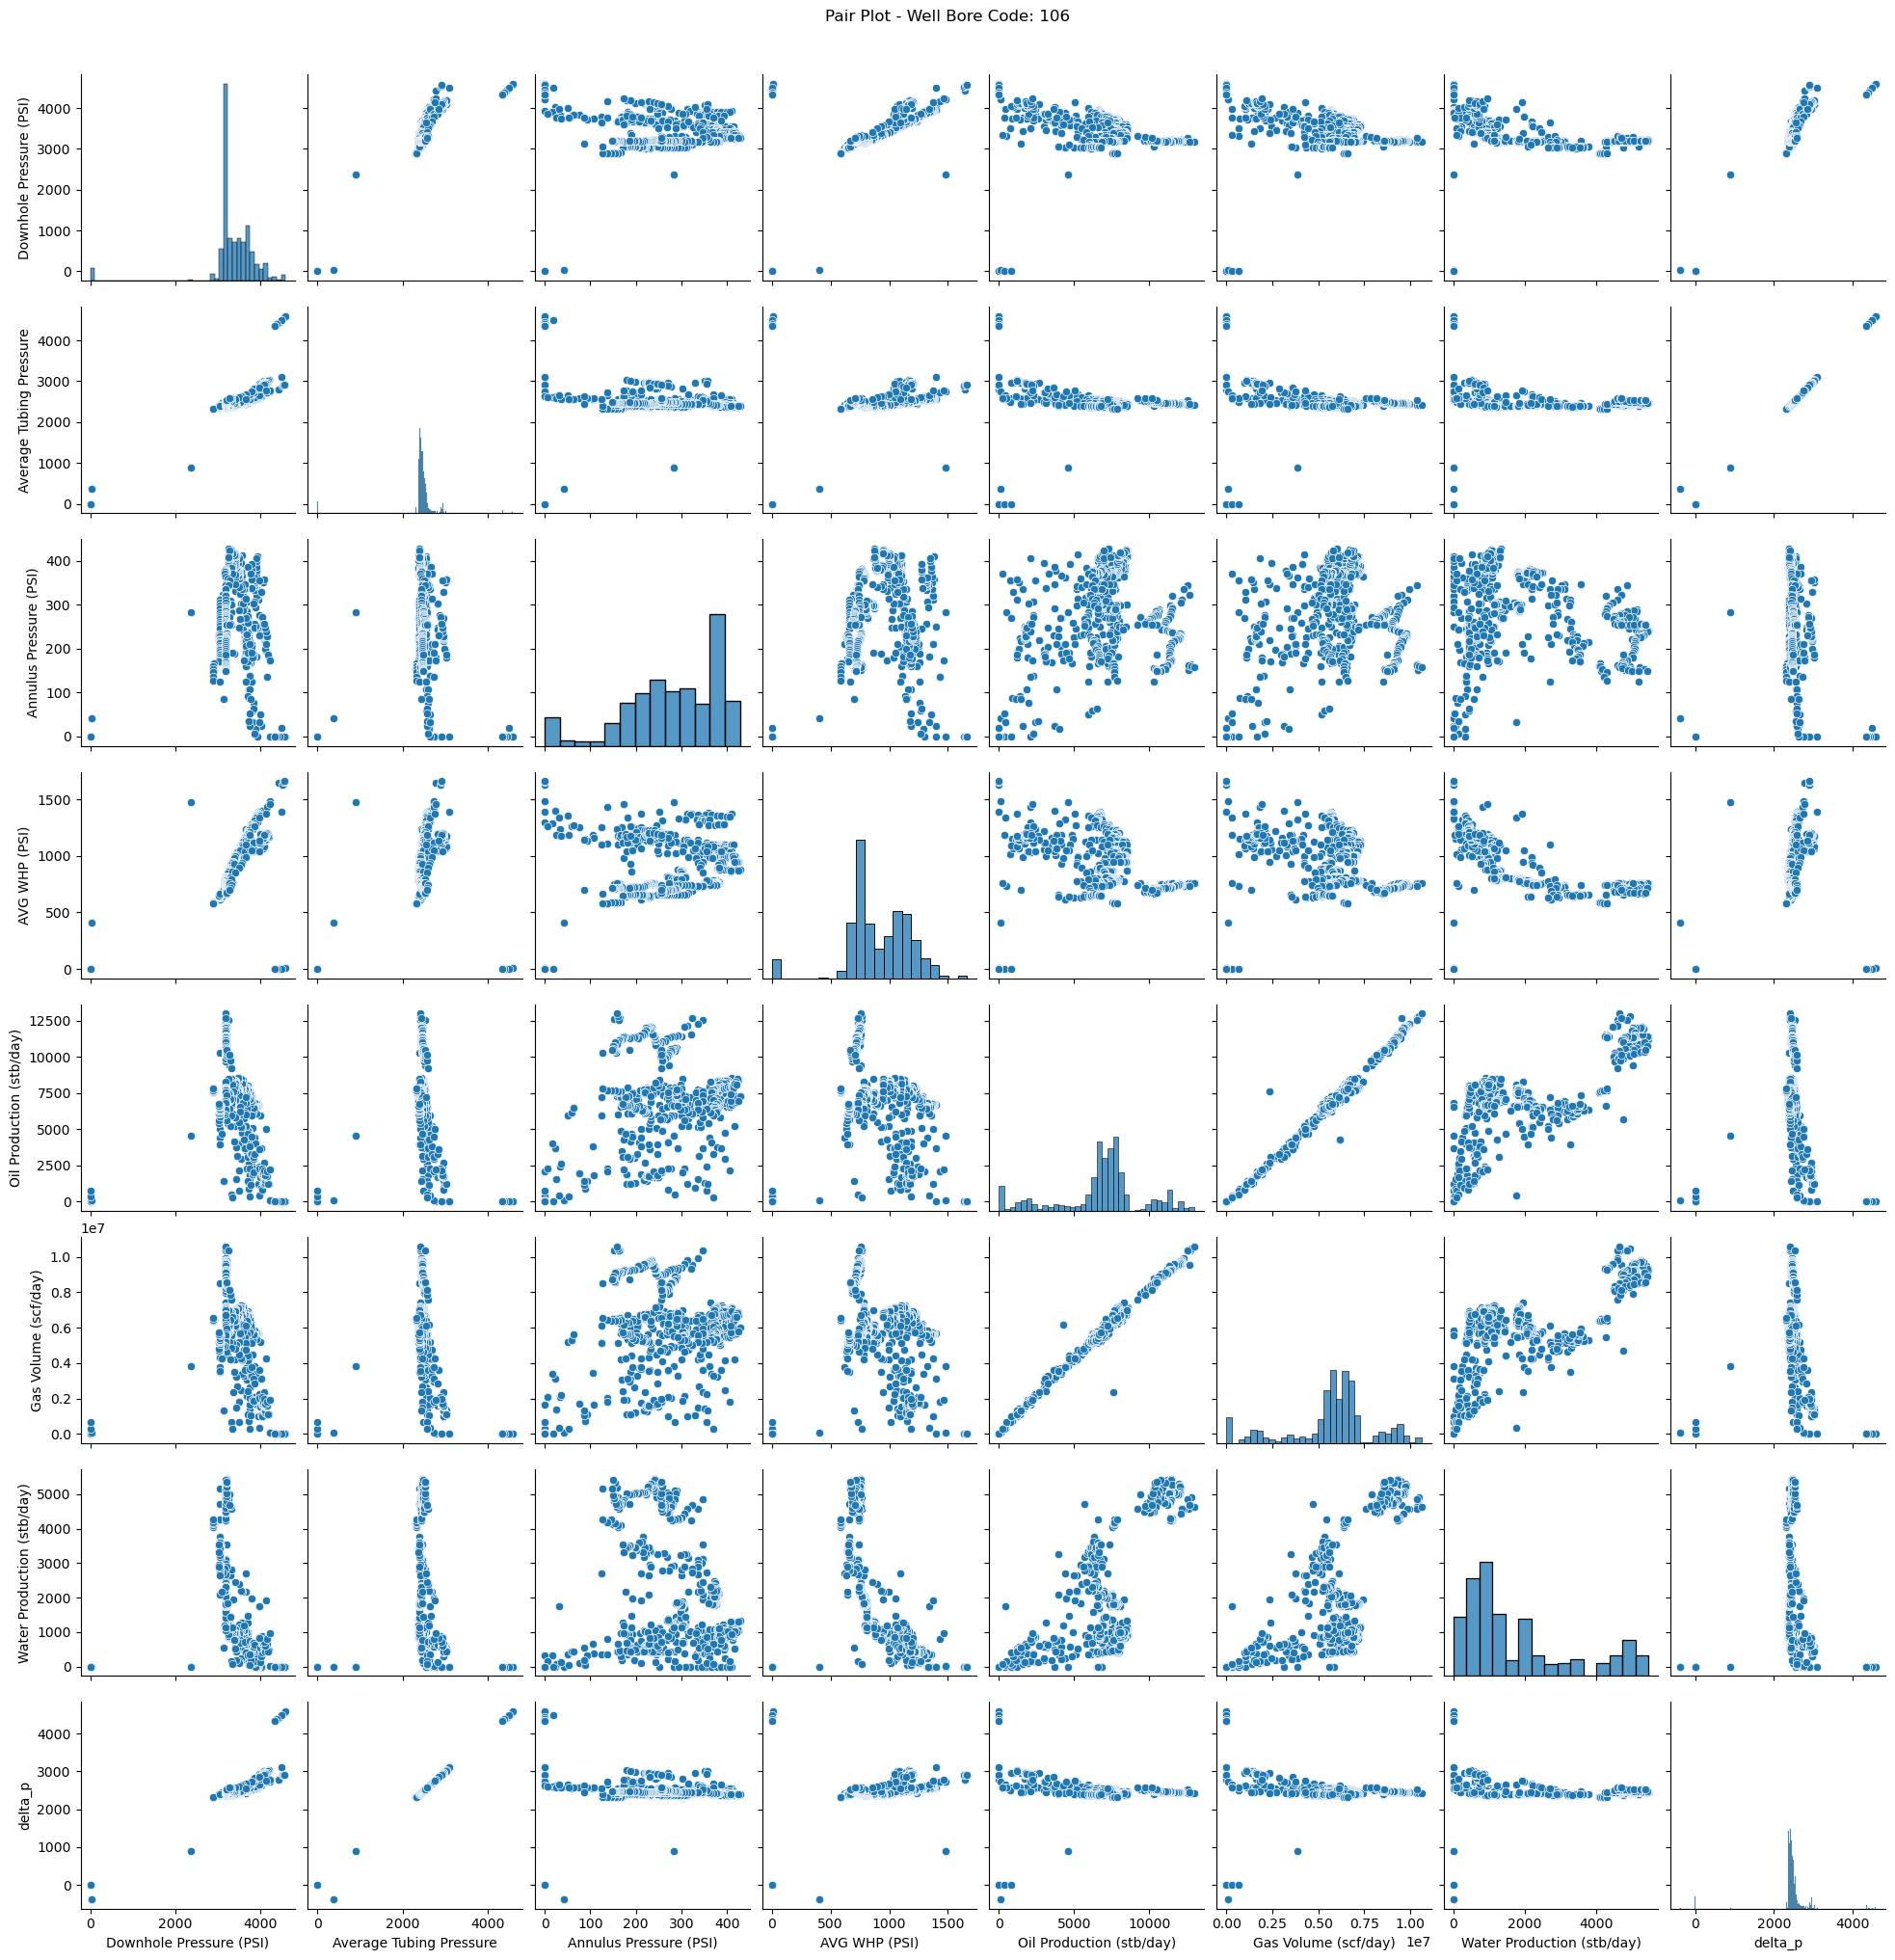

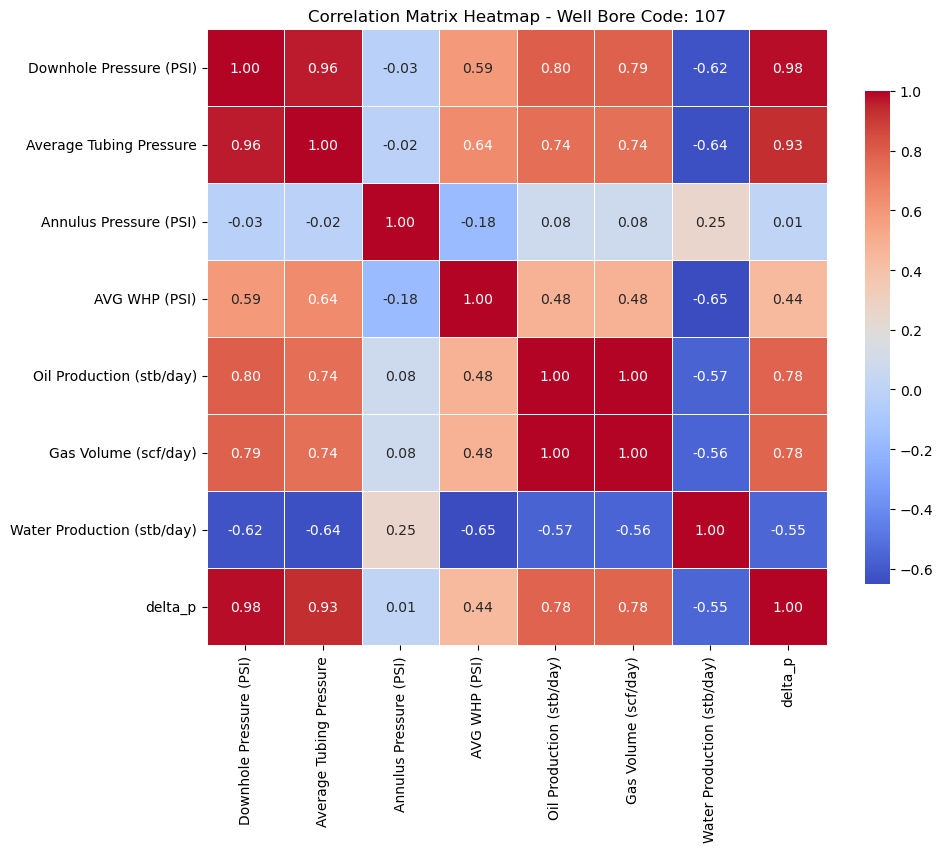

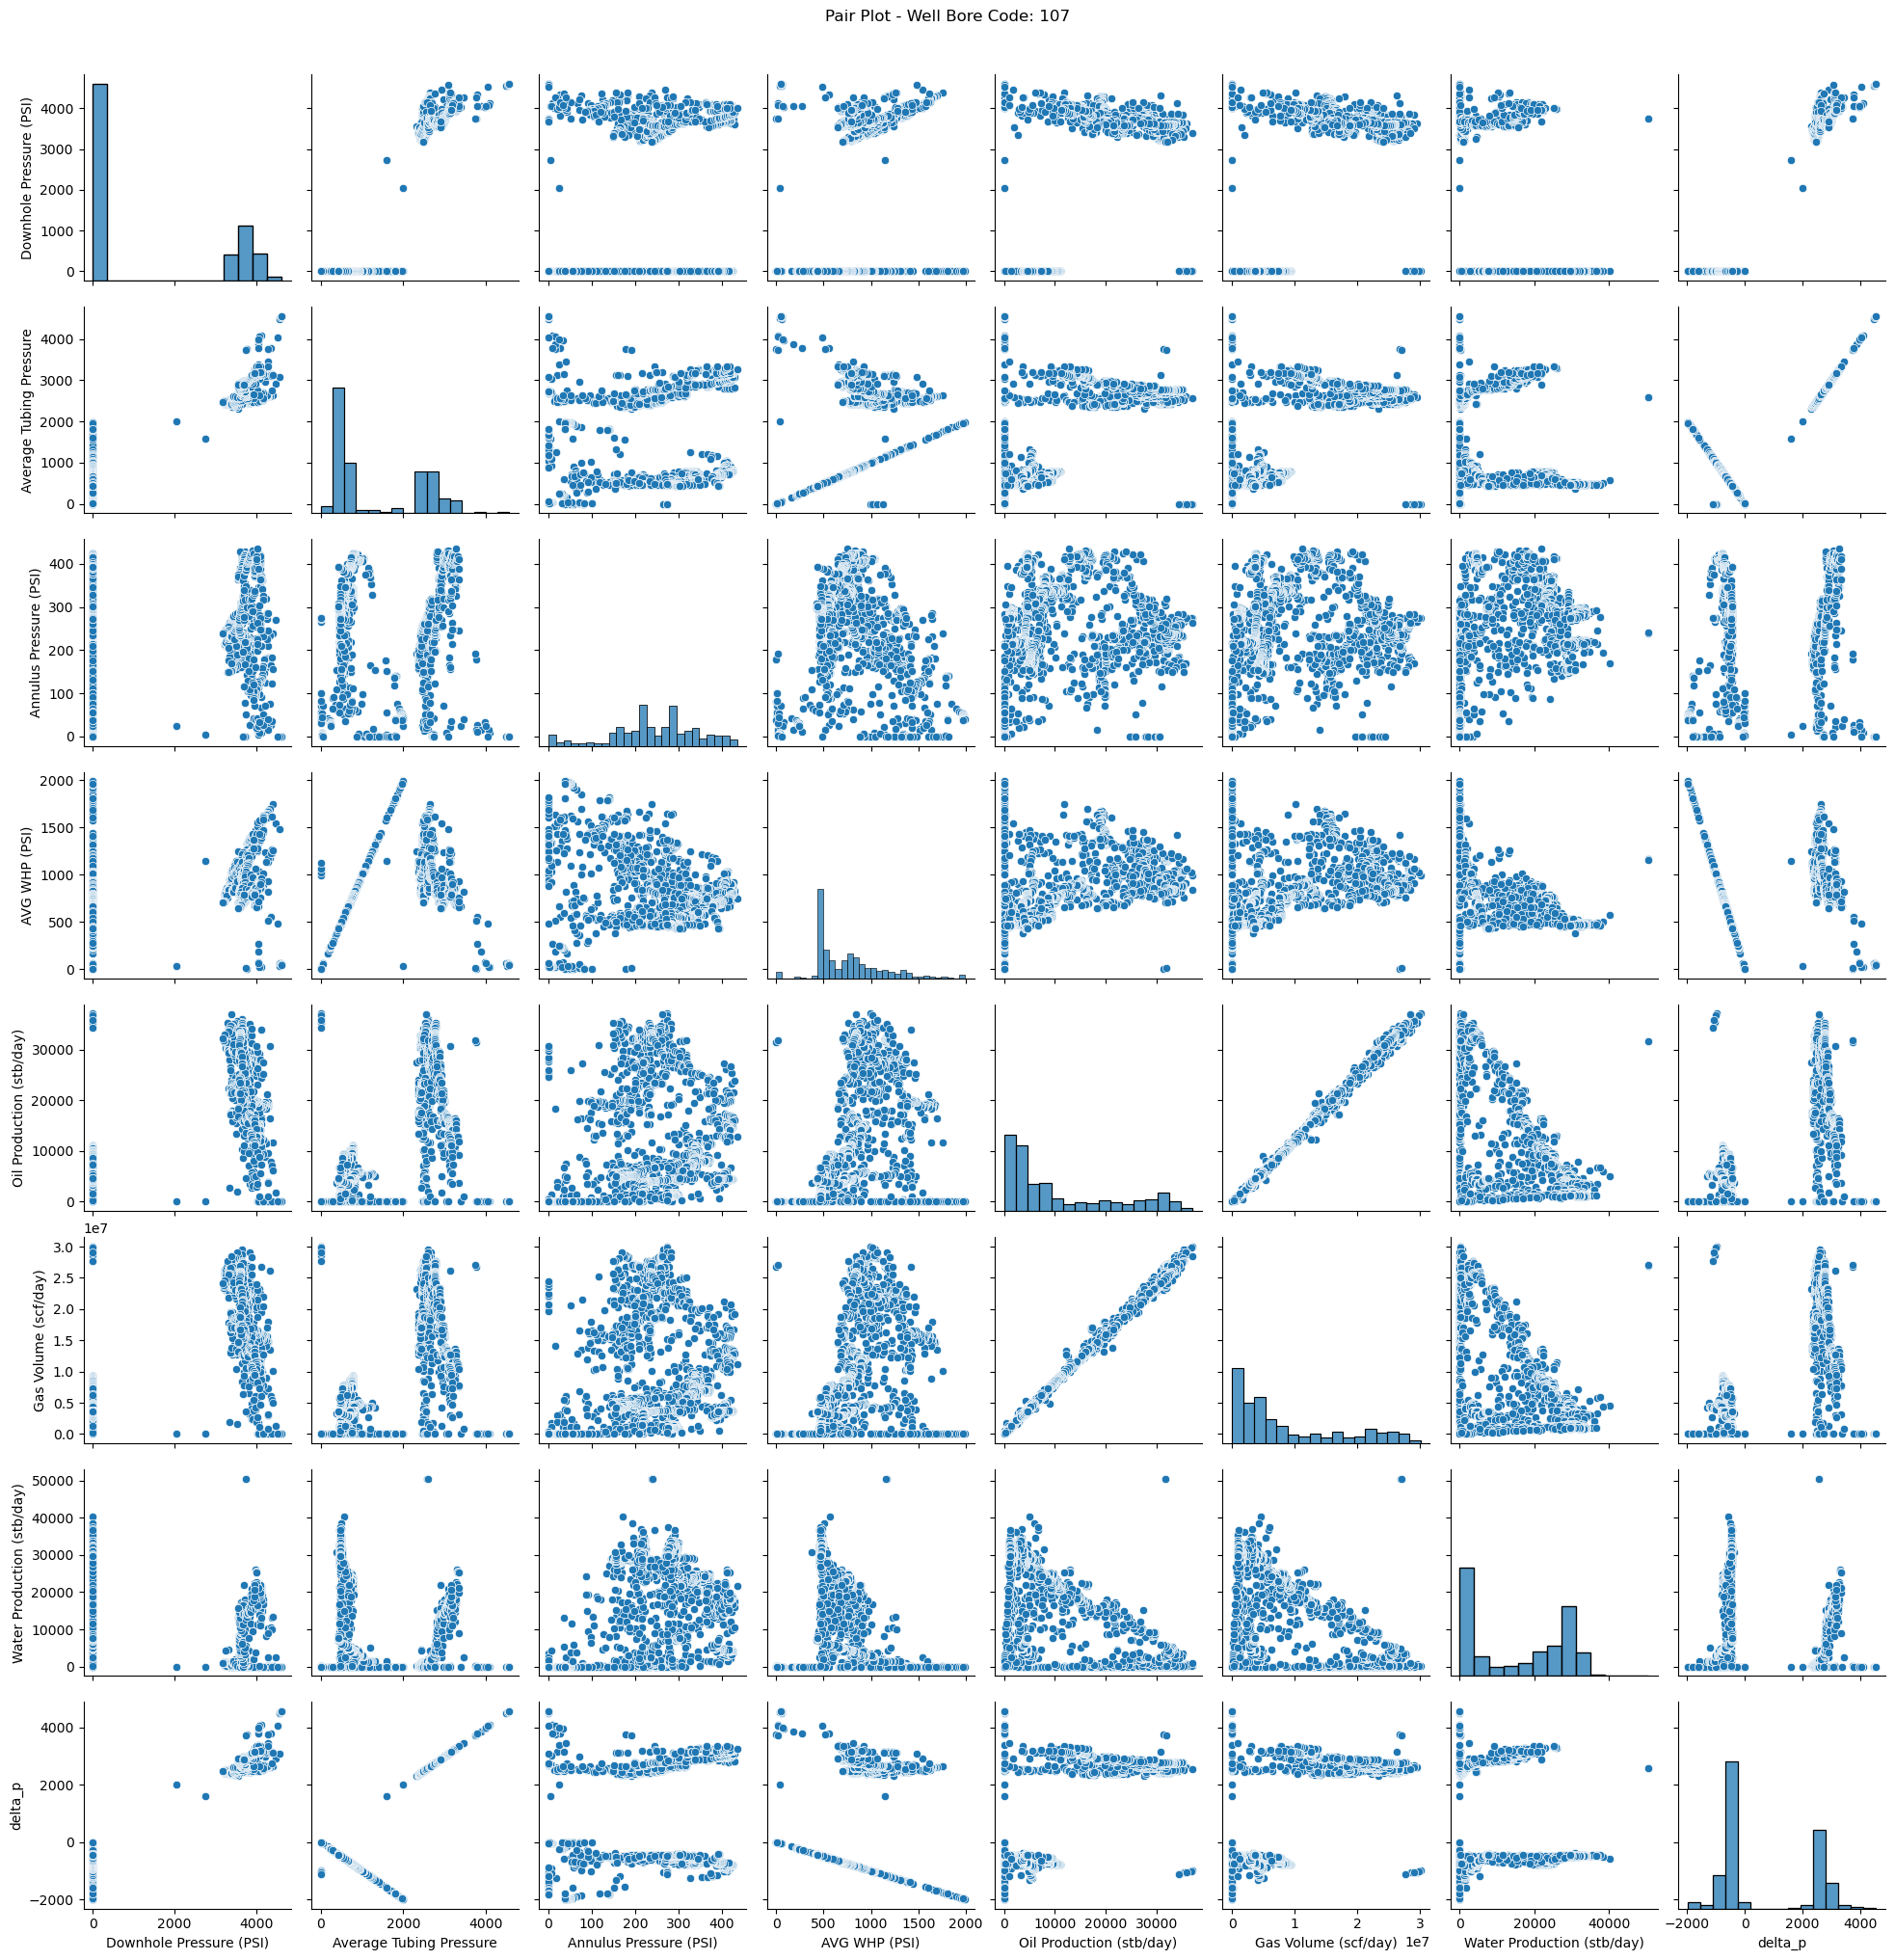

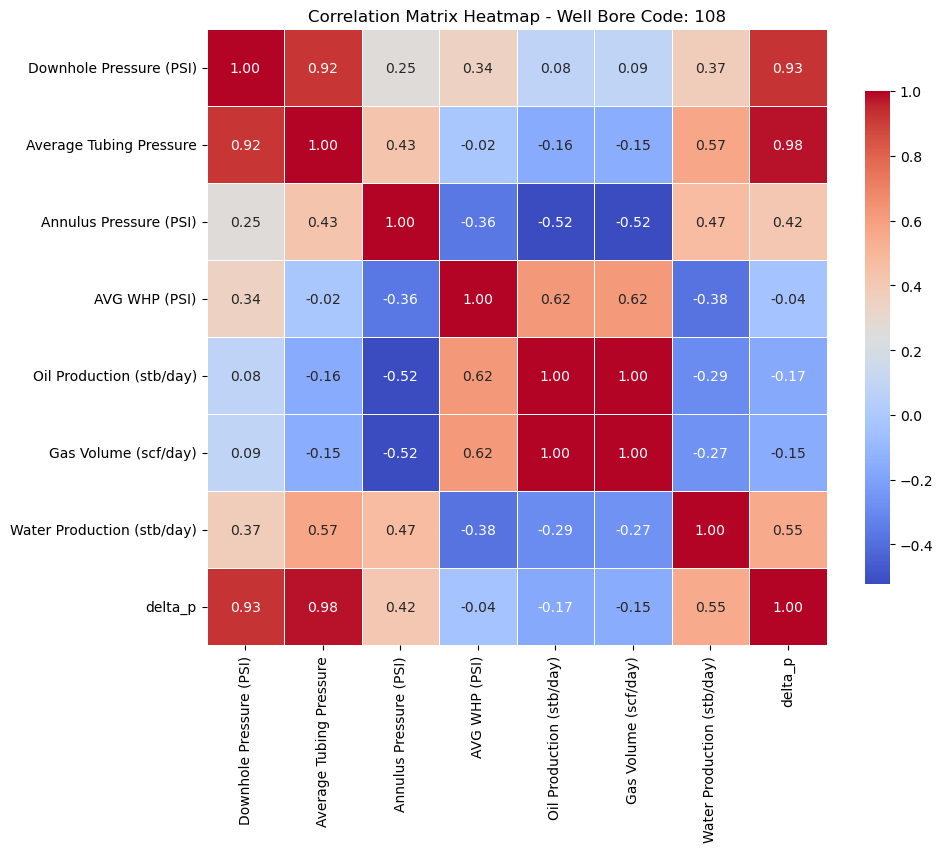

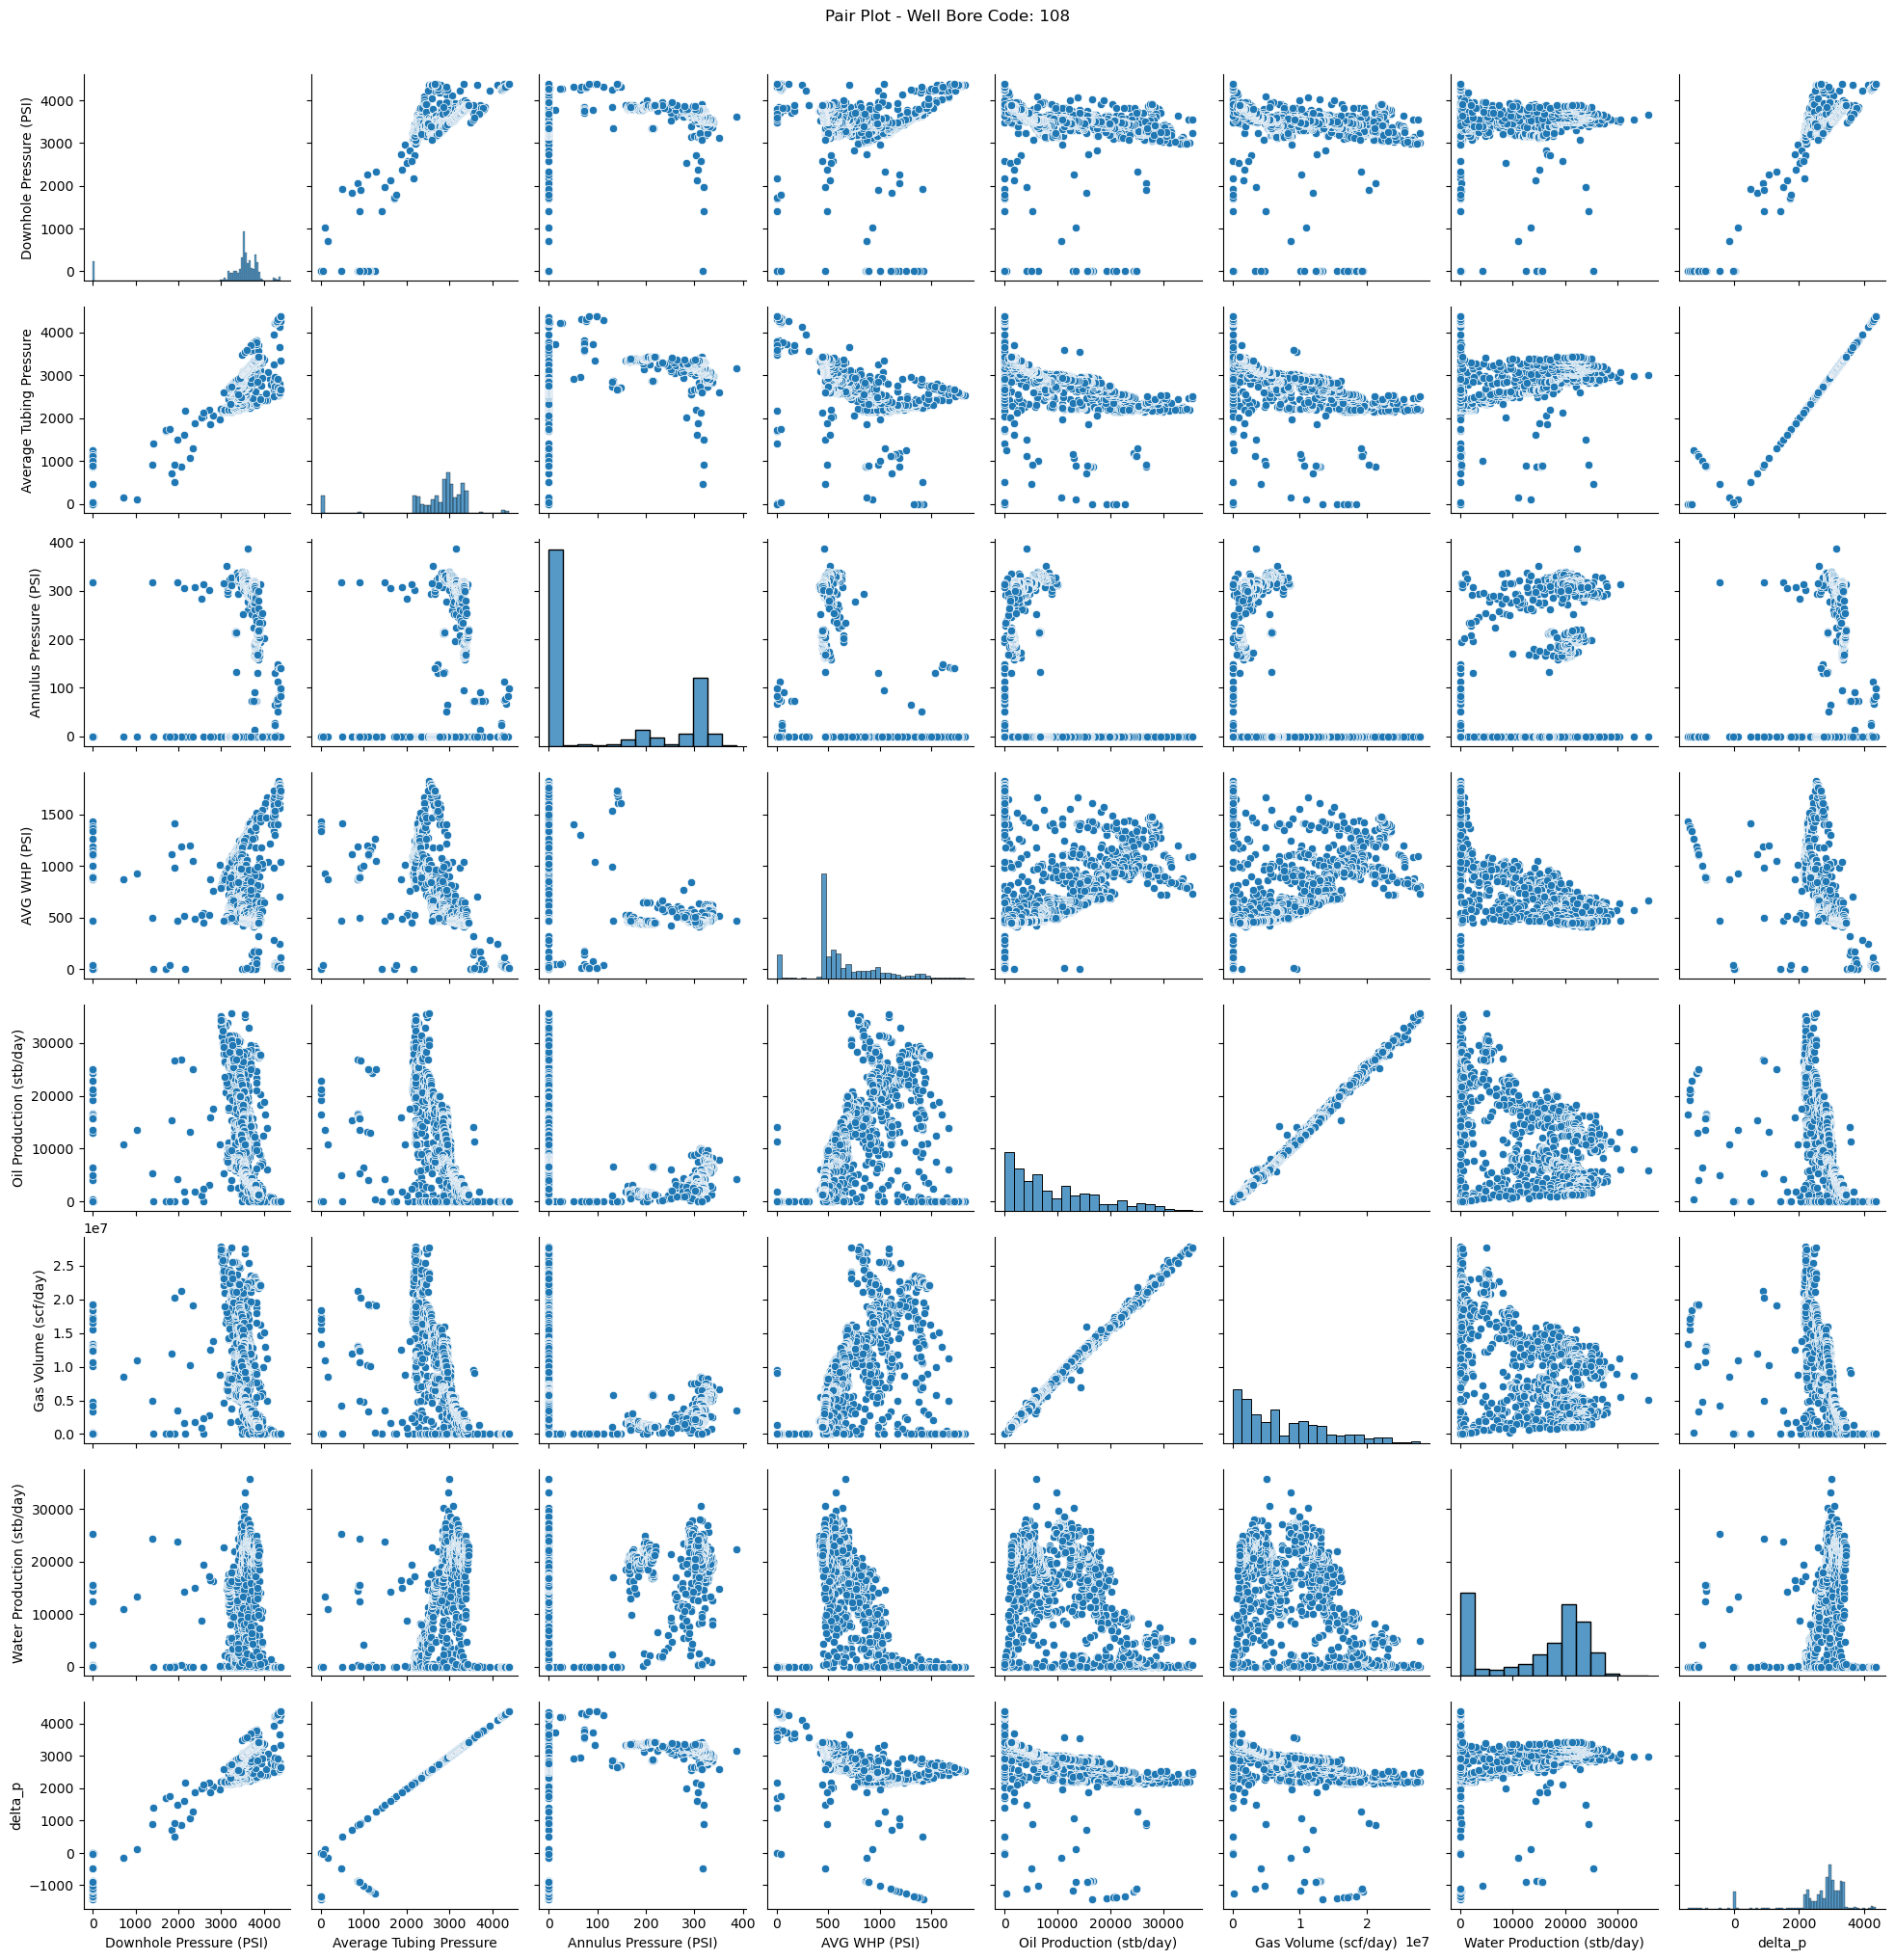

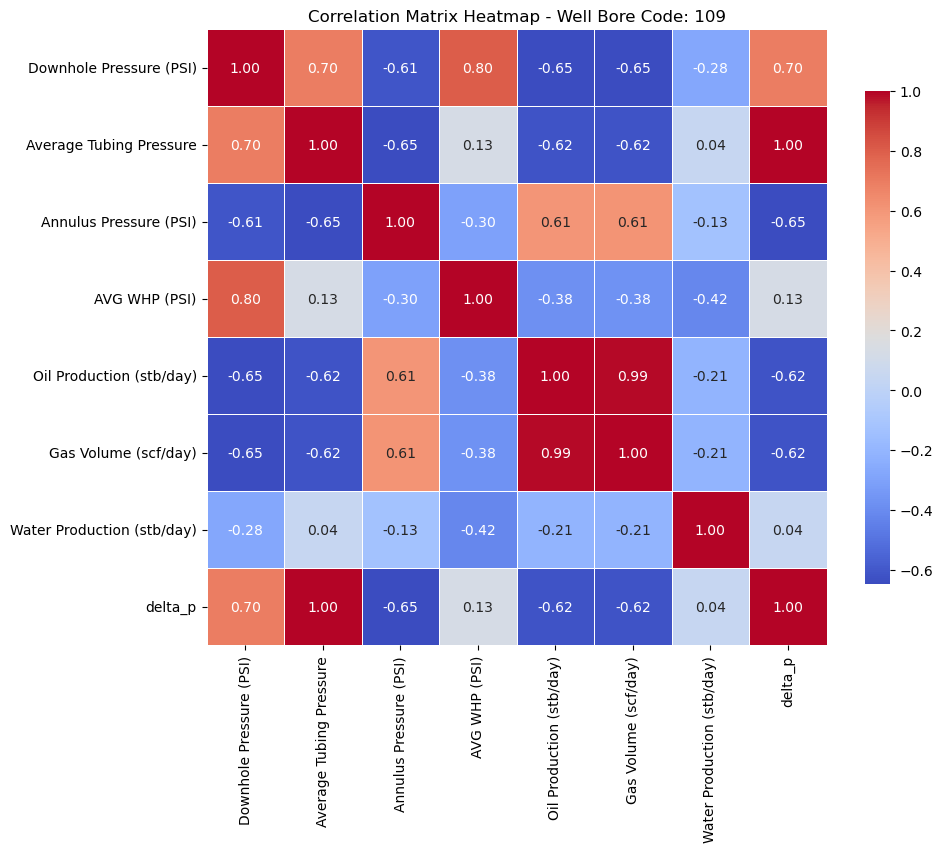

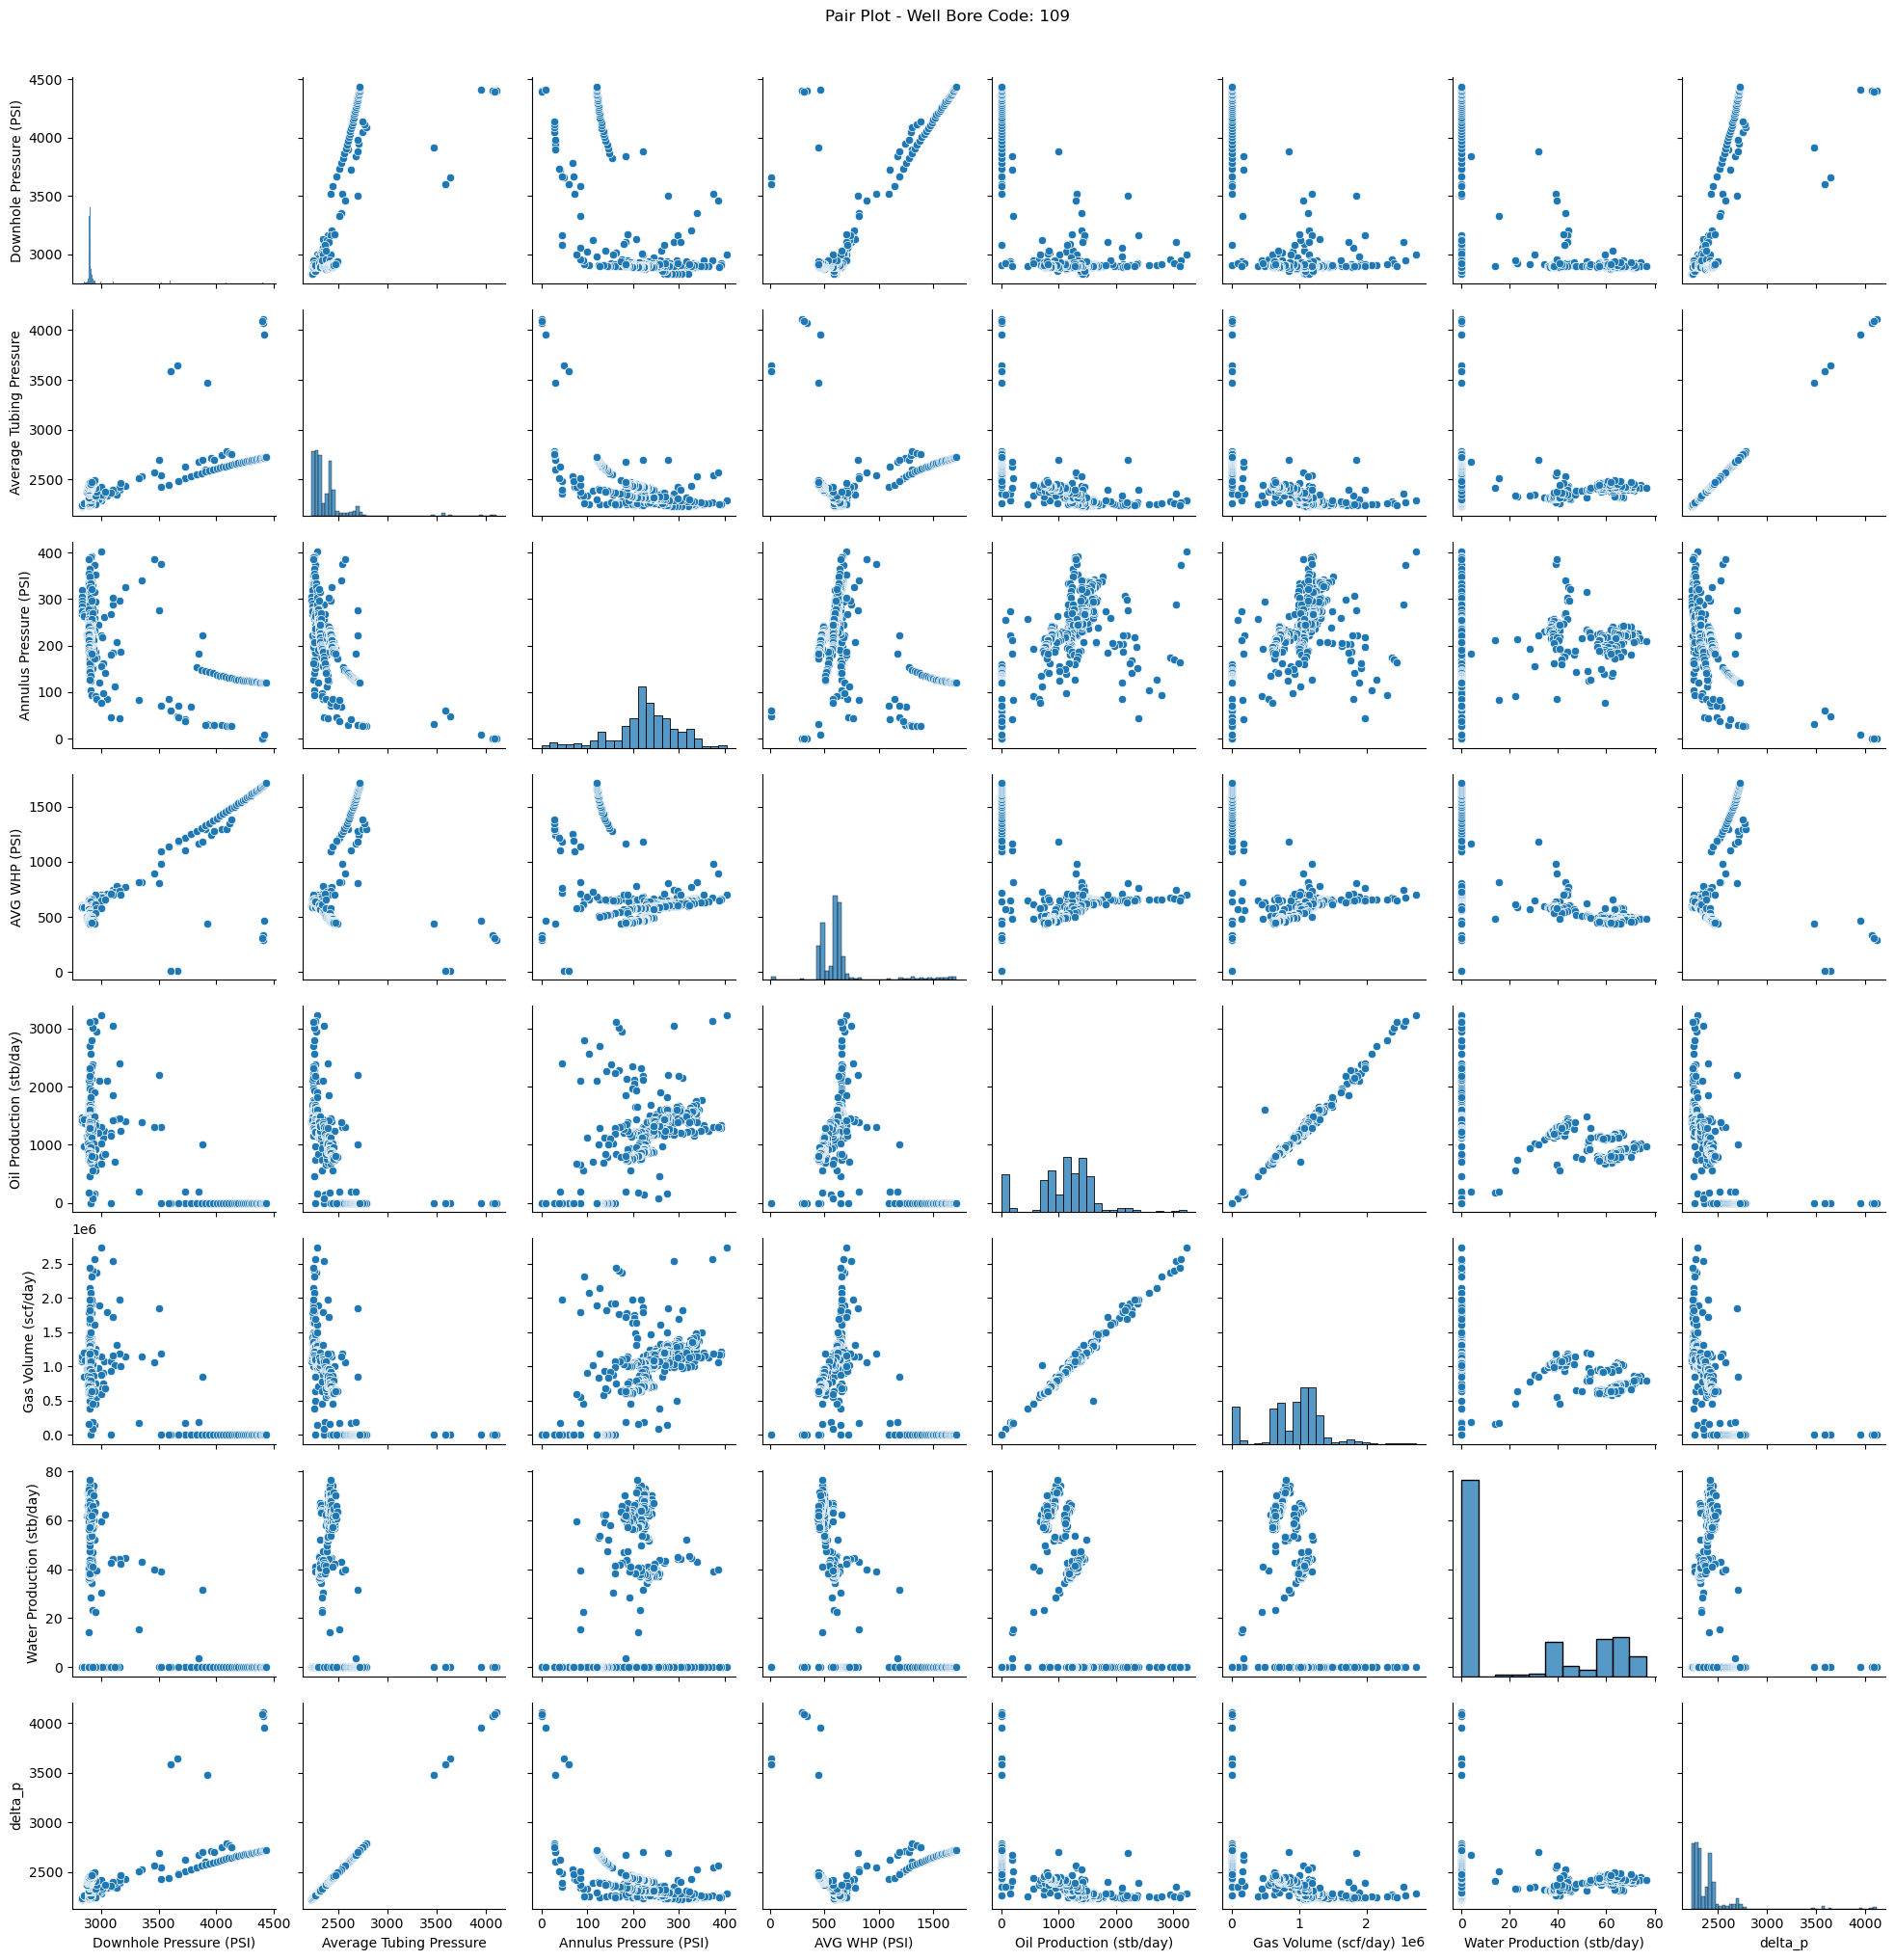

In [13]:
# List of numerical columns including the new 'delta_p' column
numerical_columns = ['Downhole Pressure (PSI)', 'Average Tubing Pressure', 'Annulus Pressure (PSI)',
                     'AVG WHP (PSI)', 'Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)', 'delta_p']

# List unique well bore codes
well_bore_codes = df['N_WELL_BORE_CODE'].unique()

# Loop through each well bore code to generate the heatmap and pair plot
for code in well_bore_codes:
    # Filter the data for the current well bore code
    well_data = df[df['N_WELL_BORE_CODE'] == code]

    # Compute the correlation matrix for the numerical columns
    correlation_matrix = well_data[numerical_columns].corr()

    # Plot the heatmap for the current well bore code
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
    plt.title(f'Correlation Matrix Heatmap - Well Bore Code: {code}')
    plt.show()

    # Create a pair plot for the numerical columns for the current well bore code
    sns.pairplot(well_data[numerical_columns])
    plt.suptitle(f'Pair Plot - Well Bore Code: {code}', y=1.02)
    plt.show()

In [15]:
columns_to_keep = ['PRODUCTION DATE', 'N_WELL_BORE_CODE',
                       'Annulus Pressure (PSI)','Downhole Pressure (PSI)','Downhole Temperature (Kelvin)', 'AVG WHP (PSI)', 'Average Tubing Pressure',
                       'Choke Size', 'Oil Production (stb/day)', 'Gas Volume (scf/day)',
                       'Water Production (stb/day)']
df = df[columns_to_keep]

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Function to create the RandomForest model
def build_random_forest_model(n_estimators=100):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    return model

# Function to preprocess and create the pipeline with Stratified Sampling and Random Forest
def create_ml_pipeline_with_random_forest(df, n_estimators=100):  # Allow user to set n_estimators
    # Create a binary column for whether oil production is 0
    df['Oil_Production_Zero'] = (df['Oil Production (stb/day)'] == 0).astype(int)

    # List of numerical columns (excluding 'PRODUCTION DATE', 'N_WELL_BORE_CODE', 'Gas Volume', 'Oil Production', 'Water Production')
    numerical_columns = [ 'Annulus Pressure (PSI)', 'AVG WHP (PSI)',
                         'Average Tubing Pressure']  # Updated name

    # Categorical column (well bore code)
    categorical_columns = ['N_WELL_BORE_CODE']

    # Define the transformations for numerical and categorical columns
    transformer = ColumnTransformer(
        transformers=[('num', StandardScaler(), numerical_columns),  # Apply StandardScaler to numerical columns
                      ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)]  # Apply OneHotEncoder with handle_unknown='ignore'
    )

    # Split the data into features (X) and target (y)
    X = df.drop(columns=['Gas Volume (scf/day)', 'Oil Production (stb/day)', 'Water Production (stb/day)',
                         'PRODUCTION DATE', 'Oil_Production_Zero'])

    # The target is a multi-output variable with the columns 'Gas Volume', 'Oil Production', and 'Water Production'
    y = df[['Gas Volume (scf/day)', 'Oil Production (stb/day)', 'Water Production (stb/day)']]

    # Stratified sampling based on both 'Oil_Production_Zero' and 'N_WELL_BORE_CODE'
    stratification_column = df['N_WELL_BORE_CODE'].astype(str) + "_" + df['Oil_Production_Zero'].astype(str)

    # Train-test split with stratification
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=stratification_column, random_state=42)

    # Transform the features once, outside the loop
    transformer.fit(X_train)
    X_train_transformed = transformer.transform(X_train)
    X_test_transformed = transformer.transform(X_test)

    # Initialize the model with the specified n_estimators
    model = build_random_forest_model(n_estimators=n_estimators)

    # Train the model on the entire training set
    model.fit(X_train_transformed, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_transformed)

    # Calculate RMSE for each target (Gas, Oil, and Water)
    rmse_gas = np.sqrt(mean_squared_error(y_test['Gas Volume (scf/day)'], y_pred[:, 0]))
    rmse_oil = np.sqrt(mean_squared_error(y_test['Oil Production (stb/day)'], y_pred[:, 1]))
    rmse_water = np.sqrt(mean_squared_error(y_test['Water Production (stb/day)'], y_pred[:, 2]))

    # Print RMSE for each target
    print(f"Root Mean Squared Error (RMSE) for Gas Volume: {rmse_gas}")
    print(f"Root Mean Squared Error (RMSE) for Oil Production: {rmse_oil}")
    print(f"Root Mean Squared Error (RMSE) for Water Production: {rmse_water}")

    # Combine true and predicted values into a DataFrame for comparison
    comparison_df = pd.DataFrame(y_test.values, columns=y_test.columns)  # True values
    comparison_df['Predicted Gas Volume (scf/day)'] = y_pred[:, 0]
    comparison_df['Predicted Oil Production (stb/day)'] = y_pred[:, 1]
    comparison_df['Predicted Water Production (stb/day)'] = y_pred[:, 2]

    # Print the first 10 rows of the comparison
    print(comparison_df.head(10))

    return comparison_df

# Example usage: Apply the function to your dataset
n_estimators_value = 20  # Set the n_estimators value
comparison_df = create_ml_pipeline_with_random_forest(df, n_estimators=n_estimators_value)

# View the true vs predicted values for the first 10 entries
comparison_df.head(10)


Root Mean Squared Error (RMSE) for Gas Volume: 1922860.6158214821
Root Mean Squared Error (RMSE) for Oil Production: 2361.1108698656117
Root Mean Squared Error (RMSE) for Water Production: 2672.212613158702
   Gas Volume (scf/day)  Oil Production (stb/day)  Water Production (stb/day)  \
0          1.955759e+06                 2136.5872                    730.6464   
1          1.127180e+07                14059.2822                  13097.6041   
2          5.248783e+06                 6736.2126                    881.5435   
3          5.210052e+06                 6318.1792                  21059.5490   
4          1.168106e+06                 1423.0496                   1134.2757   
5          2.360211e+06                 2887.3616                  20890.2851   
6          5.357419e+06                 4320.2236                      9.9382   
7          2.033867e+07                25827.8093                  10934.4731   
8          5.500687e+06                 6237.8559               

Gas Volume (scf/day)  Oil Production (stb/day)  Water Production (stb/day)  \
0          1.955759e+06                 2136.5872                    730.6464   
1          1.127180e+07                14059.2822                  13097.6041   
2          5.248783e+06                 6736.2126                    881.5435   
3          5.210052e+06                 6318.1792                  21059.5490   
4          1.168106e+06                 1423.0496                   1134.2757   
5          2.360211e+06                 2887.3616                  20890.2851   
6          5.357419e+06                 4320.2236                      9.9382   
7          2.033867e+07                25827.8093                  10934.4731   
8          5.500687e+06                 6237.8559                  16864.1819   
9          1.756979e+07                22013.8049                      6.5416   

   Predicted Gas Volume (scf/day)  Predicted Oil Production (stb/day)  \
0                    1.746327e+06                         1908.647035   
1                    1.281065e+07                        16280.929070   
2                    5.238983e+06                         6627.323265   
3                    5.273010e+06                         6039.796380   
4                    2.341275e+06                         2887.198060   
5                    2.259216e+06                         2736.907945   
6                    6.925621e+06                         8602.697765   
7                    1.418907e+07                        17692.952300   
8                    5.784577e+06                         6543.084440   
9                    1.735326e+07                        21695.615815   

   Predicted Water Production (stb/day)  
0                            668.001145  
1                          14589.180105  
2                            855.905460  
3                          19774.910850  
4                           1839.963380  
5                          20032.763110  
6                             13.564385  
7                          13694.481070  
8                          17057.665445  
9                             33.638920